In [157]:
#install.packages("ggupset")
#install.packages("ggcorrplot")

In [150]:
library(dplyr)
library(ggplot2)
library(ggupset)
library(UpSetR)
library(data.table)
library(ggcorrplot)

In [144]:
#load data
Mu1_germinal_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_1/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions_annotated.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_1", .before = GeneID)
Mu2_germinal_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_2/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions_annotated.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_2", .before = GeneID)
#we skip library 3 - Co125 background!
Mu3_germinal_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_3/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions_annotated.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_3", .before = GeneID)
Mu4_germinal_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_4/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions_annotated.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_4", .before = GeneID)
Mu5_germinal_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_5/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions_annotated.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_5", .before = GeneID)
Mu6_germinal_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_6/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions_annotated.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_6", .before = GeneID)
Mu7_germinal_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_7/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions_annotated.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_7", .before = GeneID)
Mu8_germinal_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_8/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions_annotated.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_8", .before = GeneID)
Mu_F7_1_germinal_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_F7-1//MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions_annotated.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_F7_1", .before = GeneID)

In [145]:
#merge data
B73_Mu_merged <- bind_rows(
  Mu1_germinal_annotated,
  Mu2_germinal_annotated,
  Mu3_germinal_annotated,
  Mu4_germinal_annotated,
  Mu5_germinal_annotated,
  Mu6_germinal_annotated,
  Mu7_germinal_annotated,
  Mu8_germinal_annotated,
  Mu_F7_1_germinal_annotated)

### Overlap of top N Mu species between libraries

`summarise()` has grouped output by 'lib'. You can override using the `.groups` argument.



,lib,type_candidates,count
,<list>,<list>,<int>
1,Museq_1,Mu8|MuDR,933
2,Museq_1,Mu1,540
3,Museq_1,n2_hmudrA9_hmudrA8,438
4,Museq_1,n3,357
5,Museq_1,n1_UniformMu_hit,305
6,Museq_1,Mu3|Mu4,165


geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



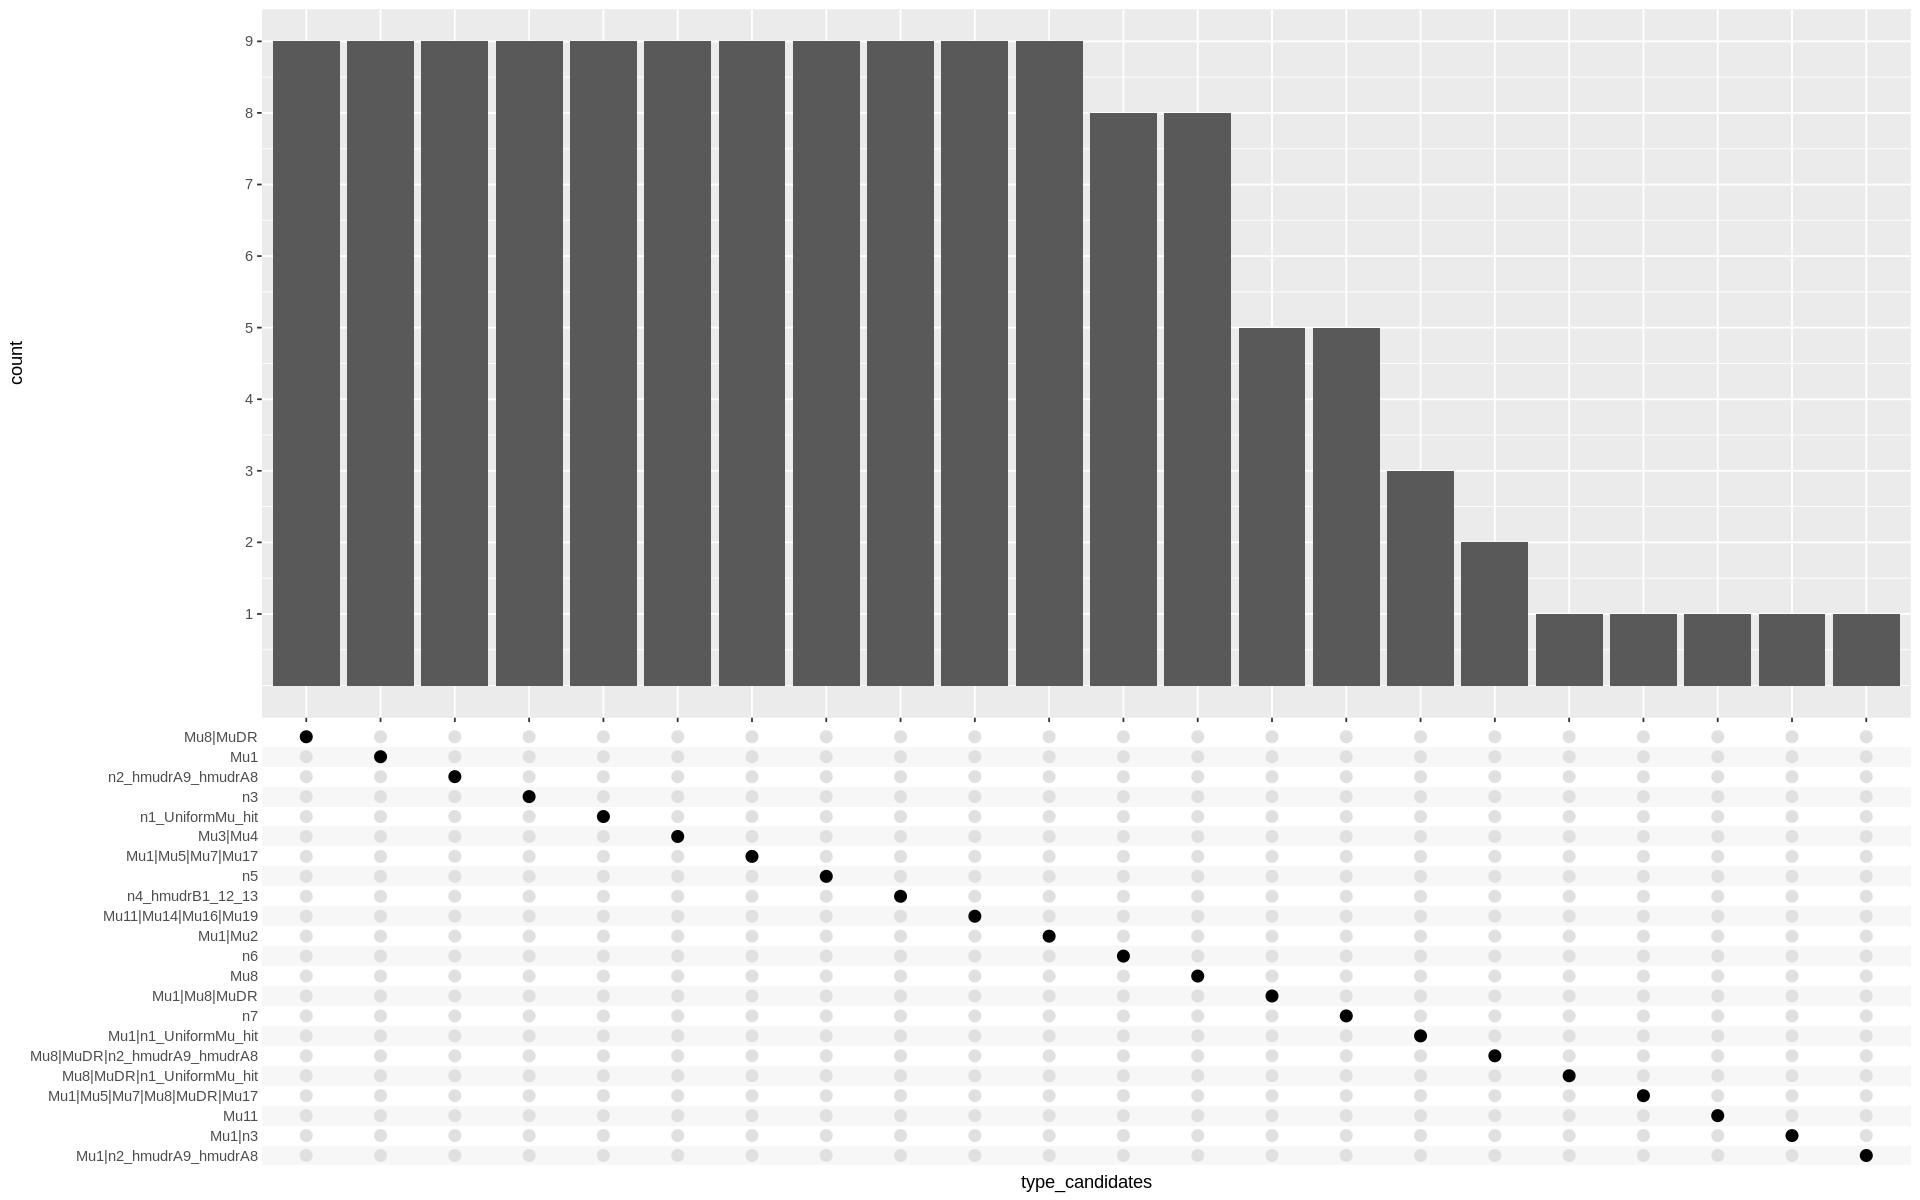

In [147]:
pd <- B73_Mu_merged %>%
  filter(StartReads >= 5) %>%
  filter(EndReads >= 5) %>%
  filter(perc_best_type_of_types >= 0.3) %>%
  group_by(lib, type_candidates) %>%
  summarise(count = n()) %>%
  arrange(lib, desc(count)) %>%
  slice(1:15) %>%
  ungroup() %>%
  mutate(type_candidates = as.list(type_candidates)) %>%
  mutate(lib = as.list(lib))


pd <- as.data.frame(pd)
head(pd)

ggplot(pd, aes(x=type_candidates)) +
    geom_bar() +
    scale_y_continuous(limit = c(0, 9), breaks = c(1,2,3,4,5,6,7,8,9)) +
    scale_x_upset(n_intersections = Inf, order_by = "degree")



#code ideas - classic UpSetR
#  select(-lib) %>%

#Mu1 <- a %>% filter(lib == "Mu1") %>% pull(type_candidates)
#Mu2 <- a %>% filter(lib == "Mu2") %>% pull(type_candidates)
#Mu4 <- a %>% filter(lib == "Mu4") %>% pull(type_candidates)
#Mu5 <- a %>% filter(lib == "Mu5") %>% pull(type_candidates)
#Mu6 <- a %>% filter(lib == "Mu6") %>% pull(type_candidates)
#Mu7 <- a %>% filter(lib == "Mu7") %>% pull(type_candidates)
#Mu8 <- a %>% filter(lib == "Mu8") %>% pull(type_candidates)

#c <- list(Mu1 = Mu1, Mu2 = Mu2, Mu4 = Mu4, Mu5 = Mu5, Mu6 = Mu6, Mu7 = Mu7, Mu8 = Mu8)
#c
#upset(c, nsets = 20)

### Count distribution of top N Mu species between libraries

`summarise()` has grouped output by 'lib'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'lib'. You can override using the `.groups` argument.



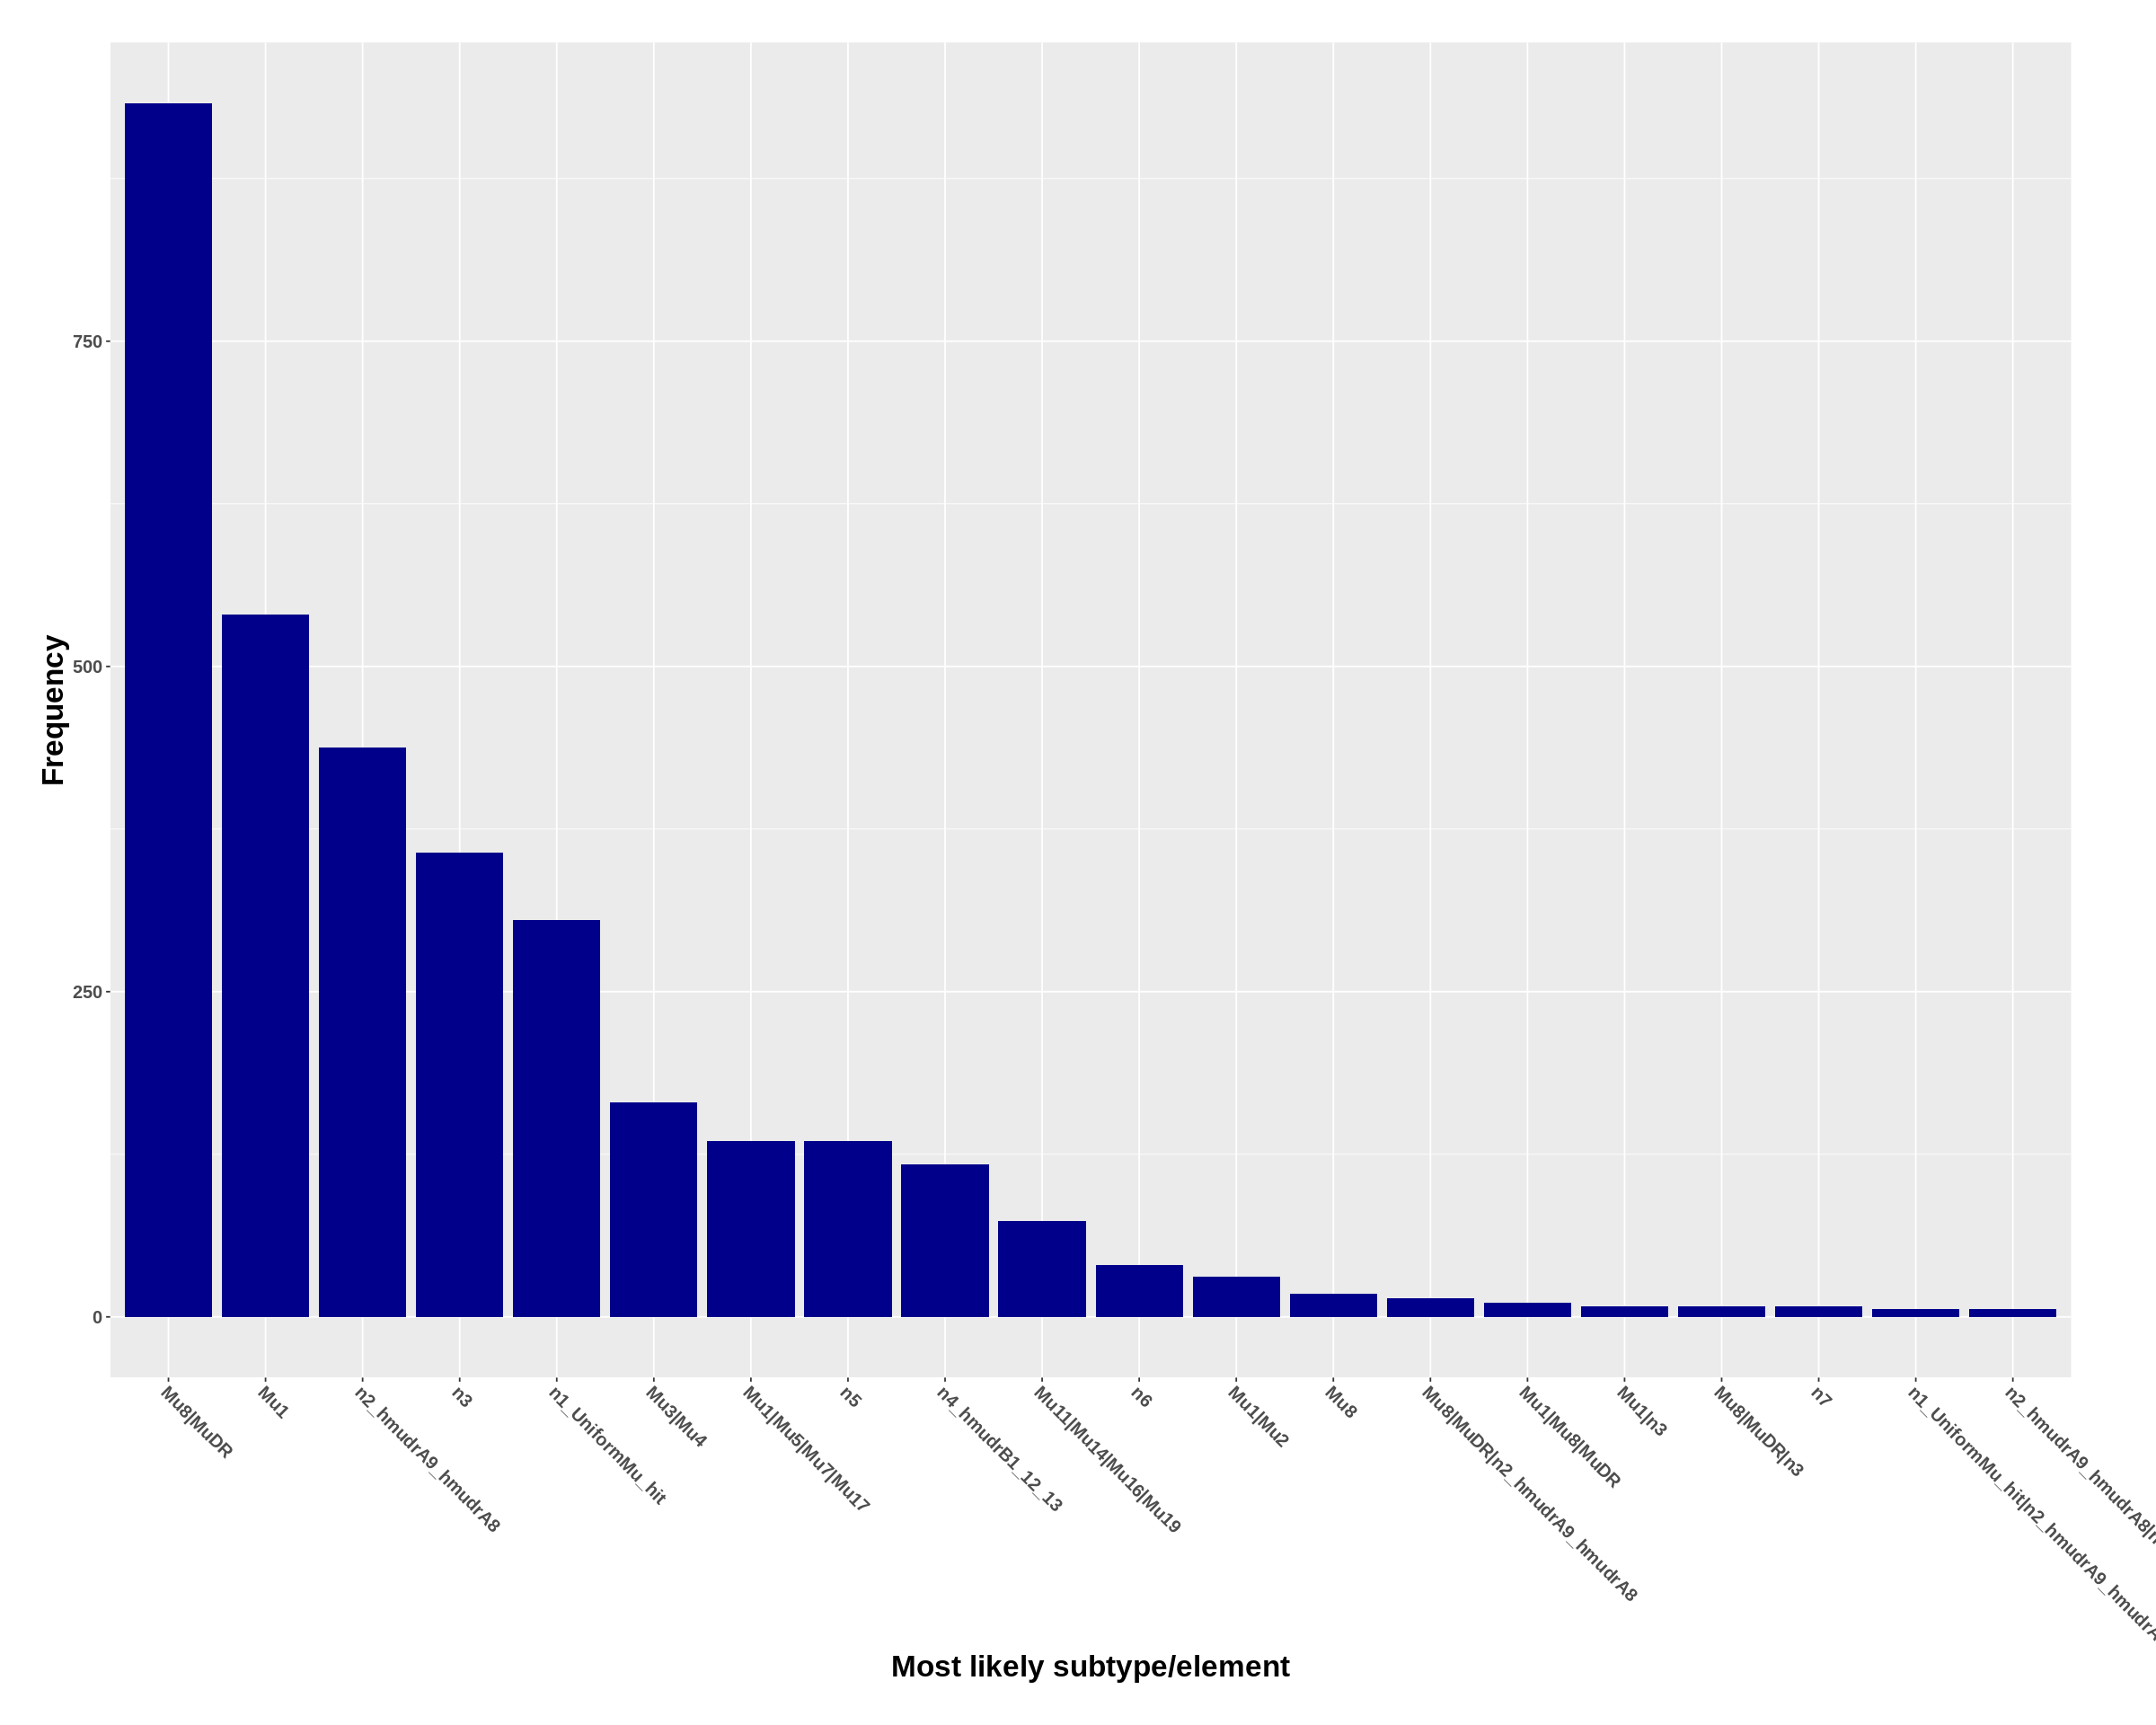

`summarise()` has grouped output by 'lib'. You can override using the `.groups` argument.



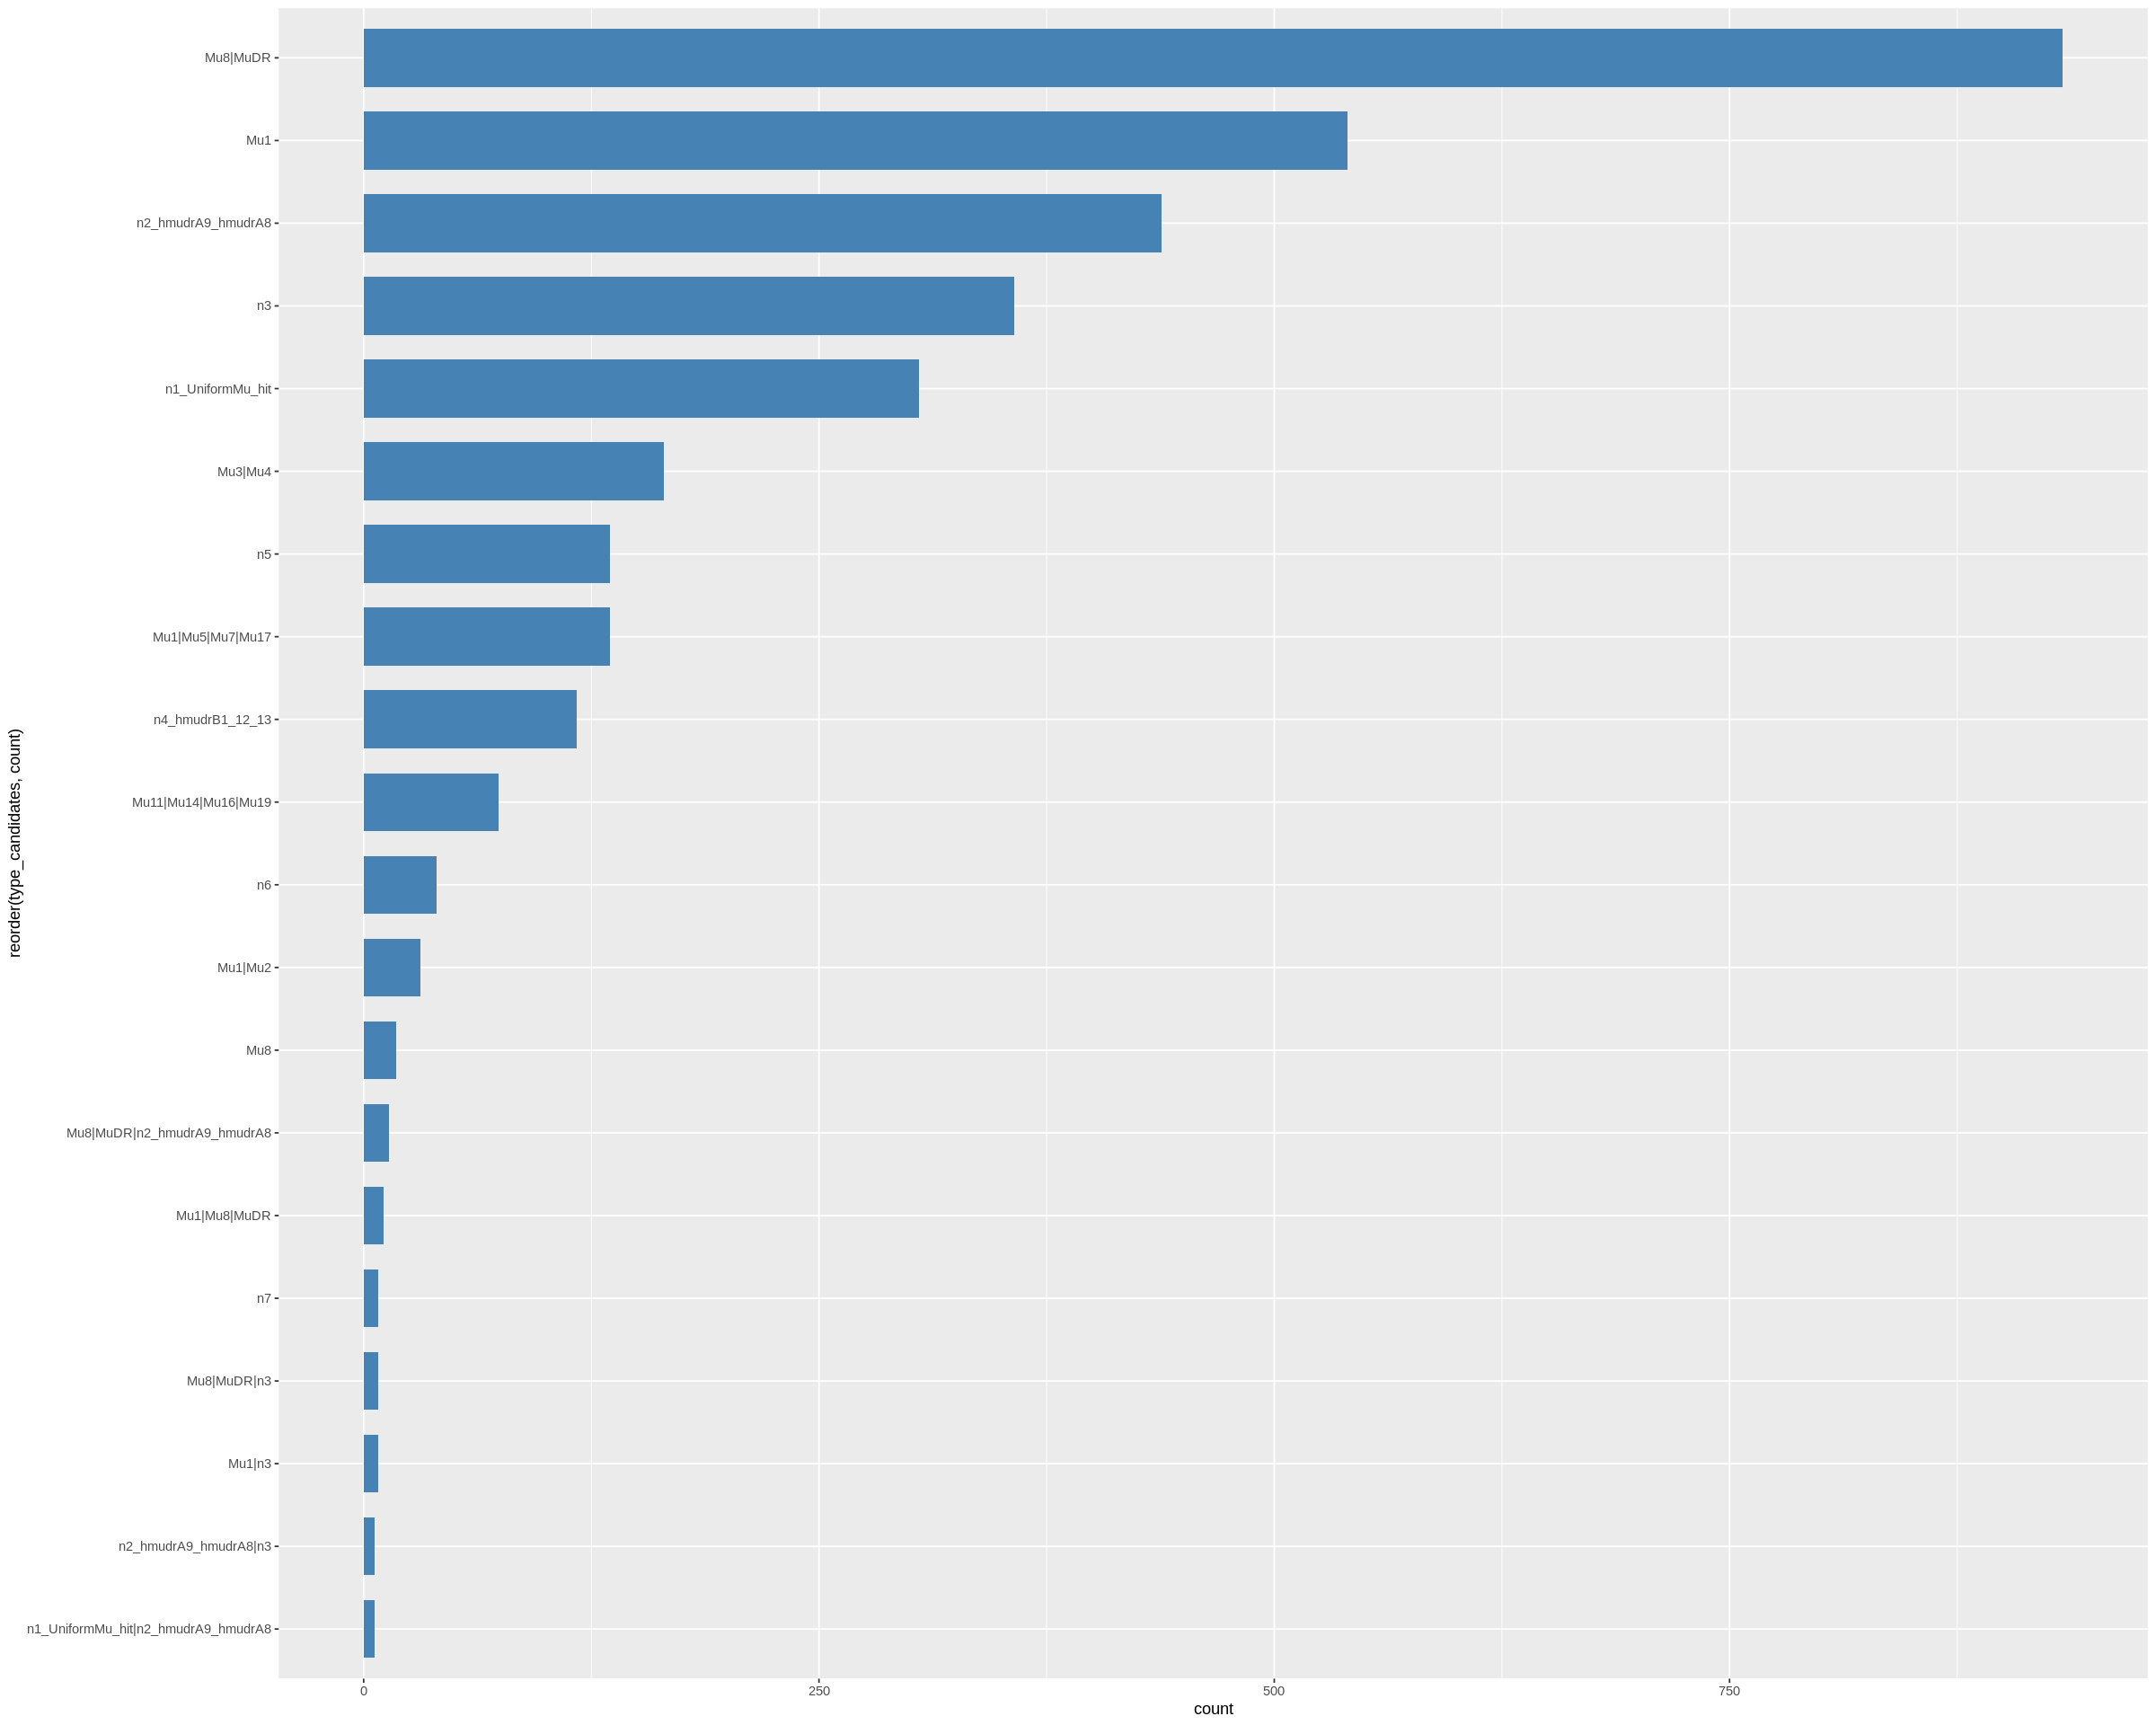

`summarise()` has grouped output by 'lib'. You can override using the `.groups` argument.



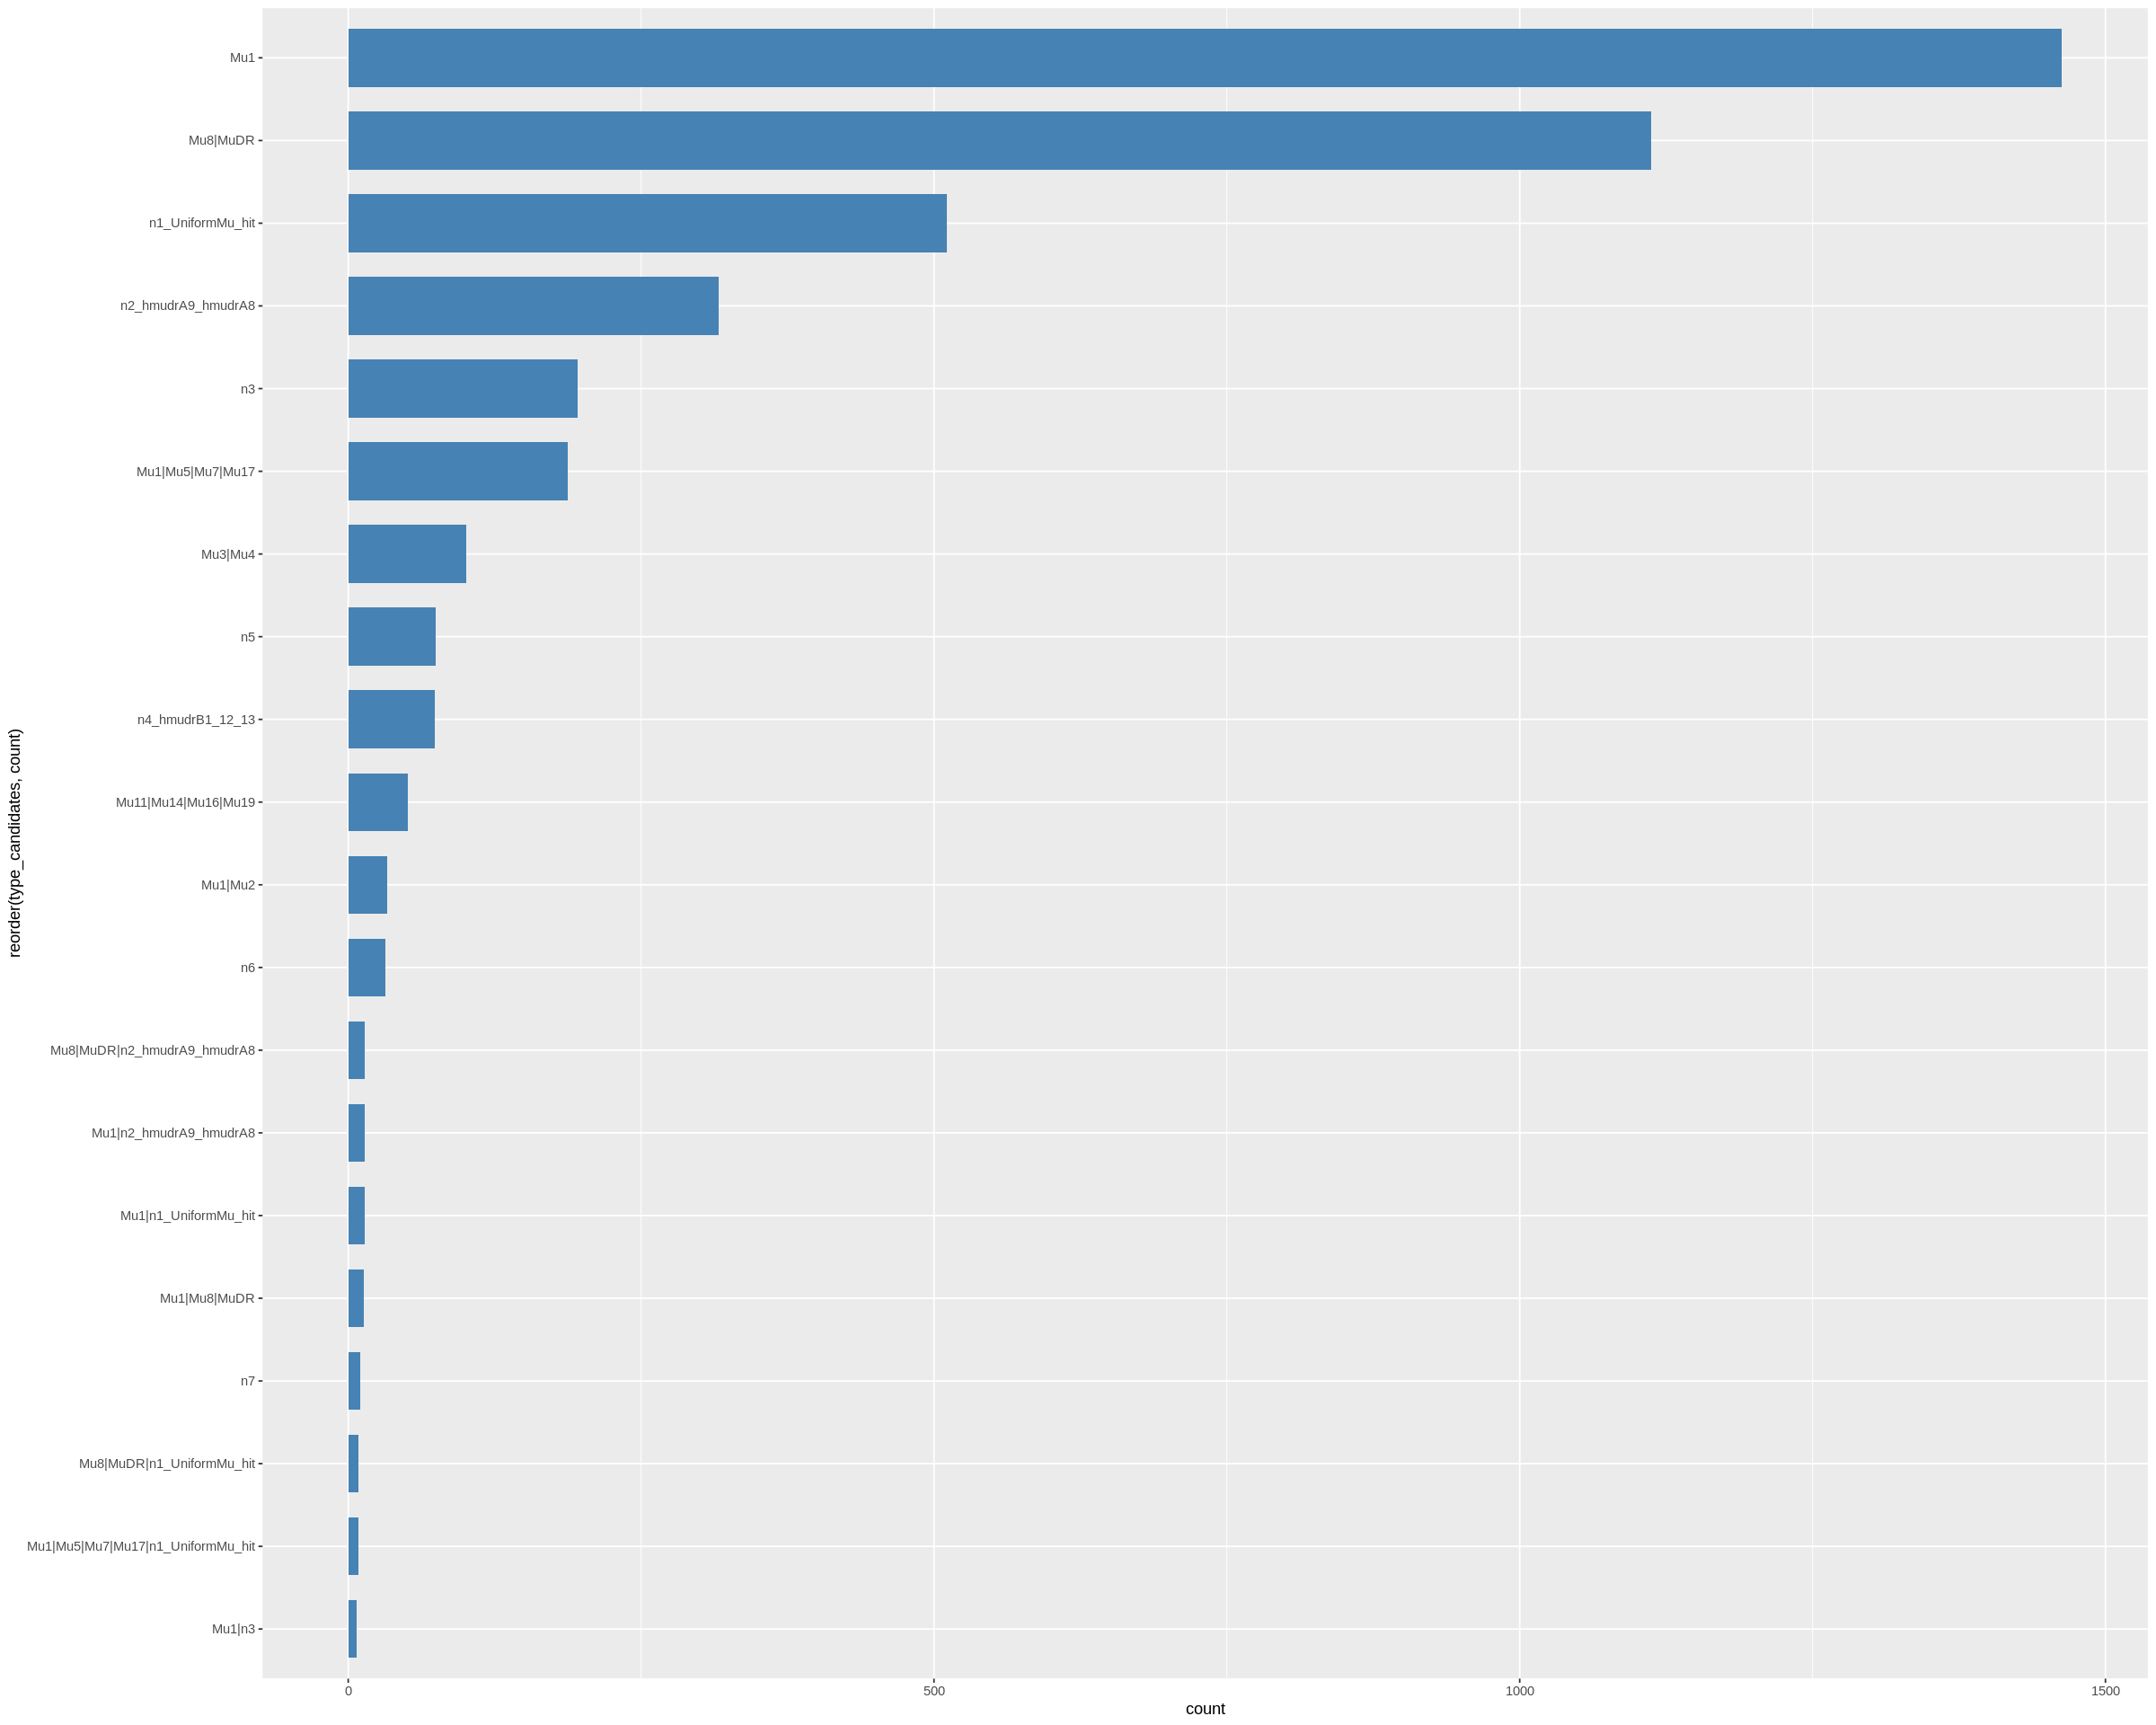

`summarise()` has grouped output by 'lib'. You can override using the `.groups` argument.



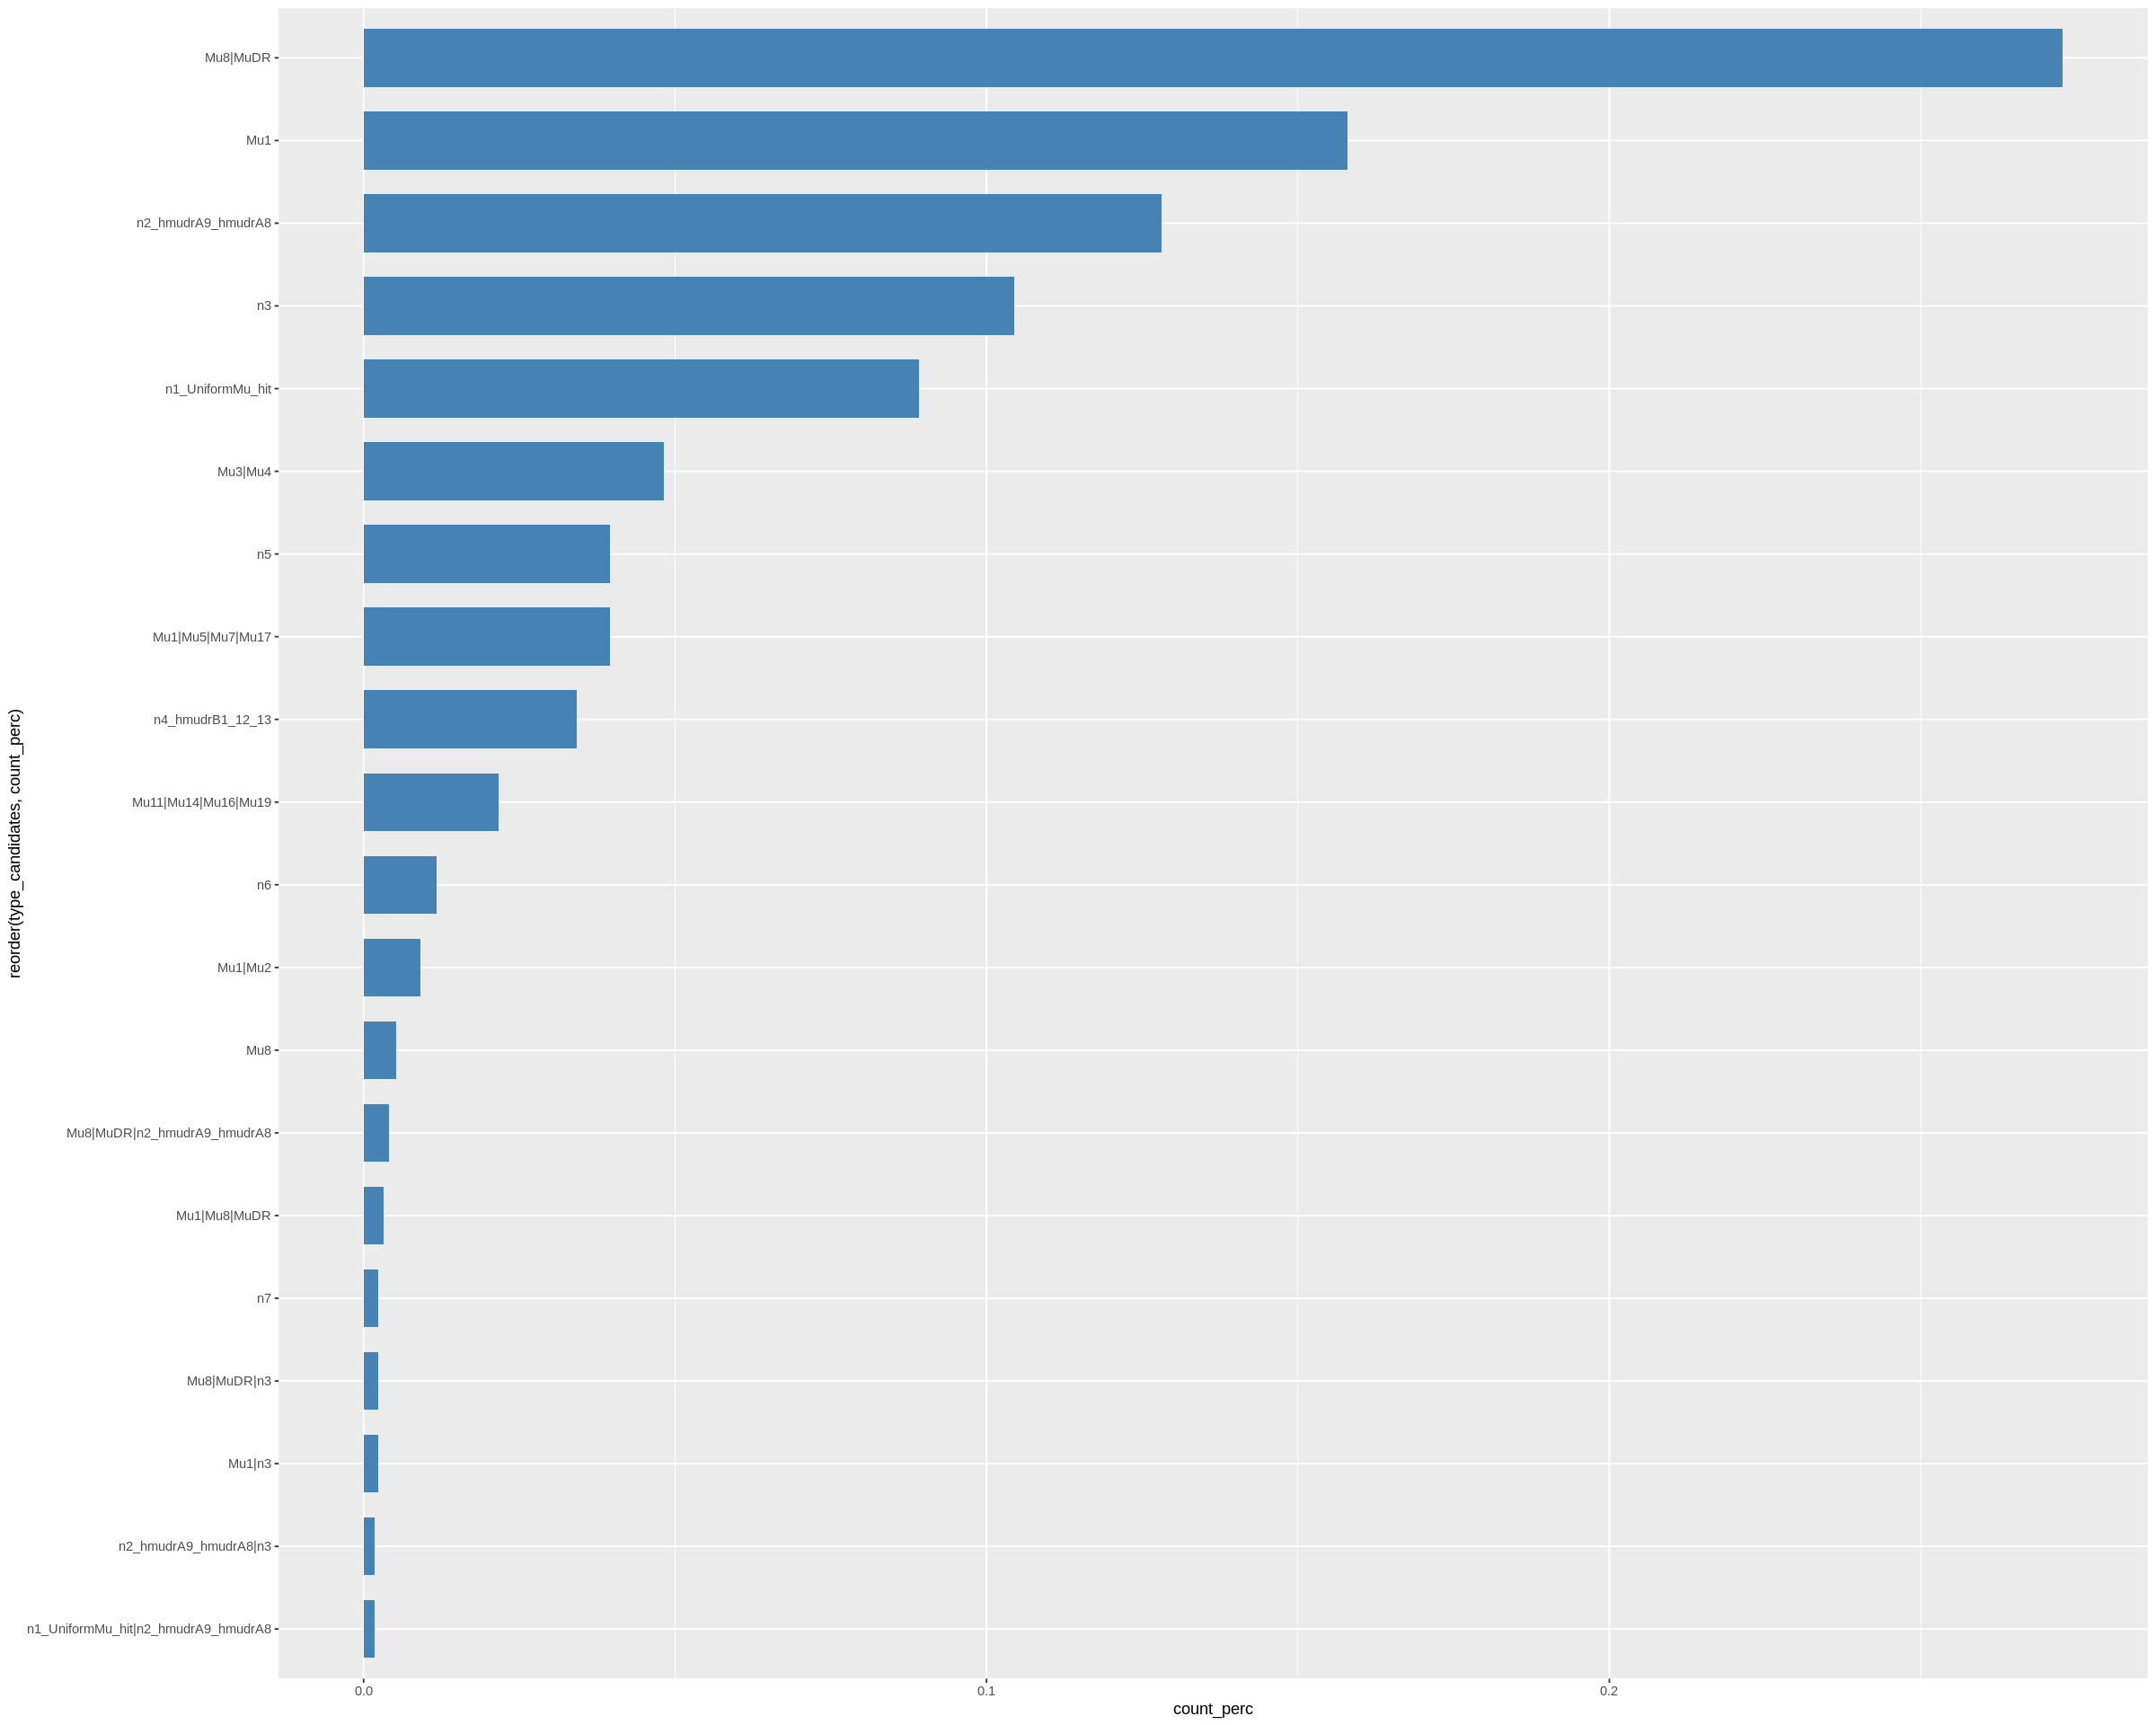

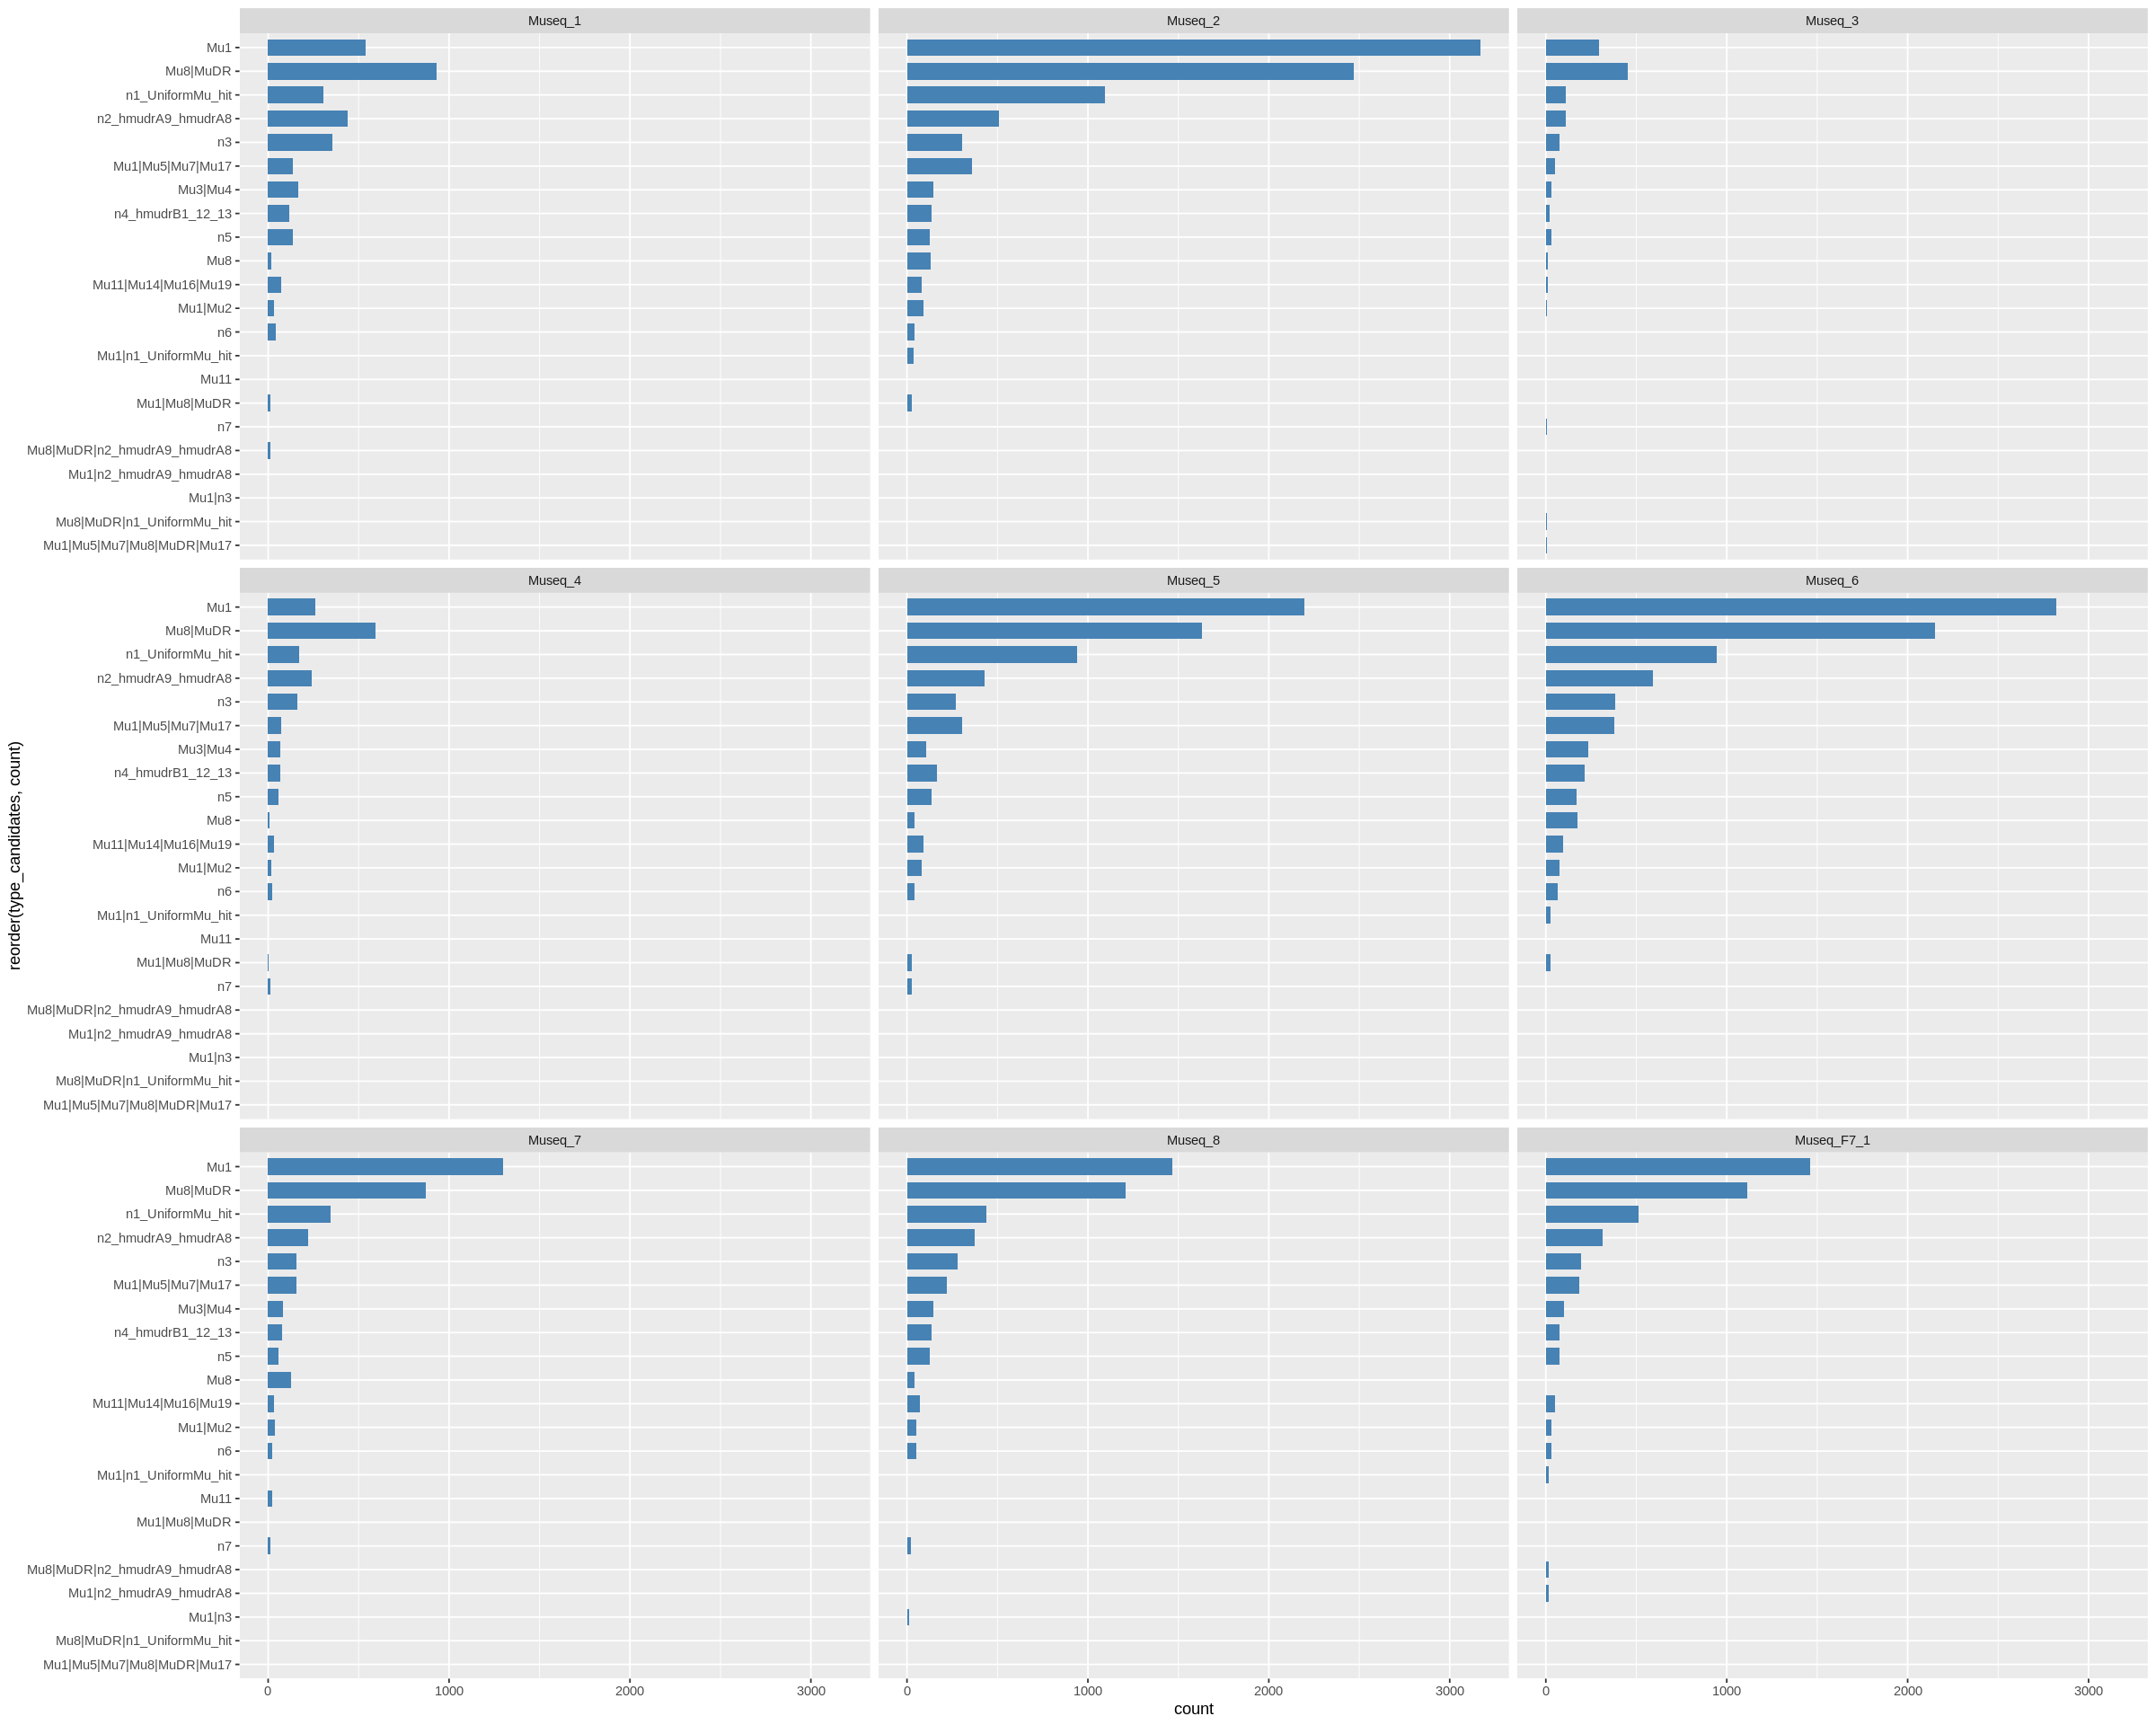

In [149]:
options(repr.plot.width=20, repr.plot.height=16)


B73_Mu_merged %>%
  filter(lib == "Museq_1") %>%
  filter(StartReads >= 5) %>%
  filter(EndReads >= 5) %>%
  filter(perc_best_type_of_types >= 0.3) %>%
  group_by(lib, type_candidates) %>%
  summarise(count = n()) %>%
  arrange(desc(count)) %>%
  head(n = 20) %>%
  #plotting
  #quick tips on reordering bars; https://sebastiansauer.github.io/ordering-bars/
  ggplot(., aes(x= reorder(type_candidates, -count), y=count)) +
    geom_col(fill = "darkblue") +
    xlab("Most likely subtype/element") +
    ylab("Frequency") +
#    title("ddd") +
    theme(axis.text.y=element_text(size=12, face="bold"),
          axis.text.x=element_text(size=12, face="bold", angle = 315, hjust = 0),
          axis.title=element_text(size=20,face="bold"),
          plot.margin = unit(c(1,2,1,1), "cm"))


B73_Mu_merged %>%
  filter(lib == "Museq_1") %>%
  filter(StartReads >= 5) %>%
  filter(EndReads >= 5) %>%
  filter(perc_best_type_of_types >= 0.3) %>%
  group_by(lib, type_candidates) %>%
  summarise(count = n()) %>%
  arrange(desc(count)) %>%
  head(n=20) %>% 
  ggplot(., aes(x = reorder(type_candidates, count), y= count)) +
    geom_bar(stat = "identity", width=0.7, fill="steelblue") +
    coord_flip()

B73_Mu_merged %>%
  filter(lib == "Museq_F7_1") %>%
  filter(StartReads >= 5) %>%
  filter(EndReads >= 5) %>%
  filter(perc_best_type_of_types >= 0.3) %>%
  group_by(lib, type_candidates) %>%
  summarise(count = n()) %>%
  arrange(desc(count)) %>%
  head(n=20) %>% 
  ggplot(., aes(x = reorder(type_candidates, count), y= count)) +
    geom_bar(stat = "identity", width=0.7, fill="steelblue") +
    coord_flip()

#or percentage
B73_Mu_merged %>%
  filter(lib == "Museq_1") %>%
  filter(StartReads >= 5) %>%
  filter(EndReads >= 5) %>%
  filter(perc_best_type_of_types >= 0.3) %>%
  group_by(lib, type_candidates) %>%
  summarise(count = n()) %>%
  arrange(desc(count)) %>%
  mutate(count_perc = count/sum(.$count)) %>%
  head(n=20) %>%
    ggplot(., aes(x = reorder(type_candidates, count_perc), y= count_perc)) +
      geom_bar(stat = "identity", width=0.7, fill="steelblue") +
      coord_flip()


B73_Mu_merged %>%
#  filter(lib != "Museq_3") %>%
  filter(StartReads >= 5) %>%
  filter(EndReads >= 5) %>%
  filter(perc_best_type_of_types >= 0.3) %>%
  group_by(lib, type_candidates) %>%
  summarise(count = n()) %>%
  arrange(desc(count)) %>%
  slice(1:15) %>% 
  ggplot(., aes(x = reorder(type_candidates, count), y= count)) +
    geom_bar(stat = "identity", width=0.7, fill="steelblue") +
    coord_flip() + 
    facet_wrap(~lib)

### Candidates determination for TE typing validation

In [89]:
B73_Mu_merged %>%
#  filter(lib == "Mu1") %>%
  filter(StartReads >= 5) %>%
  filter(EndReads >= 5) %>%
  filter(perc_best_type_of_types >= 0.3) %>%
  group_by(type_candidates) %>%
  summarise(count = n()) %>%
  arrange(desc(count)) %>%
  slice(1:15) %>%
  pull(type_candidates)

[1] "Mu1"                 "Mu8|MuDR"            "n1_UniformMu_hit"   
 [4] "n2_hmudrA9_hmudrA8"  "n3"                  "Mu1|Mu5|Mu7|Mu17"   
 [7] "Mu3|Mu4"             "n4_hmudrB1_12_13"    "n5"                 
[10] "Mu8"                 "Mu11|Mu14|Mu16|Mu19" "Mu1|Mu2"            
[13] "n6"                  "n7"                  "Mu1|Mu8|MuDR"

In [64]:
# functioning the candidate determination

best_candidate_determination <- function(mu_species) {

  best_candidates <- B73_Mu_merged %>%
    filter(lib != "Museq_3") %>%
    filter(StartReads >= 5) %>%
    filter(EndReads >= 5) %>%
    filter(perc_best_type_of_types >= 0.2) %>%
    filter(type_candidates == mu_species) %>%
    group_by(lib, Chr, GeneStart, InsertionStart, GeneID, type_candidates)  %>%
    tally() %>%
    arrange(desc(n)) %>%
    filter(n >= 2)
  nrow(best_candidates)
  
  final_best_candidates <- B73_Mu_merged %>%
    dplyr::right_join(., best_candidates, by = c("lib", "Chr", "GeneStart", "InsertionStart", "GeneID", "type_candidates")) %>%
    group_by(lib, Chr, GeneStart, InsertionStart, GeneID, type_candidates) %>%
    summarise(TotalReads = sum(TotalReads), perc_best_type_of_types = sum(perc_best_type_of_types)/2) %>%
    mutate(frac_proof_reads = TotalReads*perc_best_type_of_types) %>%
    arrange(desc(perc_best_type_of_types))
  
      
  if (nrow(final_best_candidates) > 20) {
    final_best_candidates <- head(final_best_candidates, n=20)
  }
      
  return(final_best_candidates)

}    

`summarise()` has grouped output by 'lib', 'Chr', 'GeneStart', 'InsertionStart', 'GeneID'. You can override using the `.groups` argument.



lib,Chr,GeneStart,InsertionStart,GeneID,type_candidates,TotalReads,perc_best_type_of_types,frac_proof_reads
<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>
Museq_6,3,158081035,158082624,Zm00001eb142390,Mu1,24,0.5419580,13.00699
Museq_6,10,143196860,143202521,Zm00001eb430350,Mu1,21,0.5272727,11.07273
Museq_5,7,142050974,142052450,Zm00001eb317510,Mu1,44,0.5205882,22.90588
Museq_5,7,142051798,142052450,Zm00001eb317520,Mu1,44,0.5205882,22.90588
Museq_5,1,28542661,28542655,Zm00001eb009240,Mu1,34,0.5073260,17.24908
Museq_5,8,71404309,71404326,Zm00001eb343760,Mu1,36,0.4953560,17.83282
Museq_2,5,198484997,198485042,Zm00001eb250220,Mu1,26,0.4880952,12.69048
Museq_6,6,95642068,95642245,Zm00001eb272780,Mu1,32,0.4880952,15.61905
Museq_6,6,95642218,95642245,Zm00001eb272790,Mu1,32,0.4880952,15.61905


In [88]:
Mu1_candidates <- best_candidate_determination(mu_species = "Mu1")
Mu8_MuDR_candidates <- best_candidate_determination(mu_species = "Mu8|MuDR")
n1_UniformMu_hit_candidates <- best_candidate_determination(mu_species = "n1_UniformMu_hit")
n2_hmudrA9_hmudrA8_candidates <- best_candidate_determination(mu_species = "n2_hmudrA9_hmudrA8")
n3_candidates <- best_candidate_determination(mu_species = "n3")
Mu1_Mu5_Mu7_Mu17_candidates <- best_candidate_determination(mu_species = "Mu1|Mu5|Mu7|Mu17")
Mu3_Mu4_candidates <- best_candidate_determination(mu_species = "Mu3|Mu4")
n4_hmudrB1_12_13_candidates <- best_candidate_determination(mu_species = "n4_hmudrB1_12_13")
n5_candidates <- best_candidate_determination(mu_species = "n5")
Mu8_candidates <- best_candidate_determination(mu_species = "Mu8")
Mu11_Mu14_Mu16_Mu19_candidates <- best_candidate_determination(mu_species = "Mu11|Mu14|Mu16|Mu19")
Mu1_Mu2_candidates <- best_candidate_determination(mu_species = "Mu1|Mu2")
n6_candidates <- best_candidate_determination(mu_species = "n6")
n7_candidates <- best_candidate_determination(mu_species = "n7")

`summarise()` has grouped output by 'lib', 'Chr', 'GeneStart', 'InsertionStart', 'GeneID'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'lib', 'Chr', 'GeneStart', 'InsertionStart', 'GeneID'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'lib', 'Chr', 'GeneStart', 'InsertionStart', 'GeneID'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'lib', 'Chr', 'GeneStart', 'InsertionStart', 'GeneID'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'lib', 'Chr', 'GeneStart', 'InsertionStart', 'GeneID'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'lib', 'Chr', 'GeneStart', 'InsertionStart', 'GeneID'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'lib', 'Chr', 'GeneStart', 'InsertionStart', 'GeneID'. You can override using the `.groups` argument.

`summarise()` has grouped o

In [ ]:
#writing to ecel sheet

In [109]:
best_candidates <- B73_Mu_merged %>%
    filter(lib != "Museq_3") %>%
    filter(StartReads >= 5) %>%
    filter(EndReads >= 5) %>%
    filter(perc_best_type_of_types >= 0.2) %>%
    filter(type_candidates == "n3") %>%
    group_by(lib, Chr, GeneStart, InsertionStart, GeneID, type_candidates)  %>%
    tally() %>%
    arrange(desc(n)) %>%
    filter(n >= 2)
  nrow(best_candidates)
  
  final_best_candidates <- B73_Mu_merged %>%
    dplyr::right_join(., best_candidates, by = c("lib", "Chr", "GeneStart", "InsertionStart", "GeneID", "type_candidates")) %>%
    group_by(lib, Chr, GeneStart, InsertionStart, GeneID, type_candidates) %>%
    summarise(TotalReads = sum(TotalReads), perc_best_type_of_types = sum(perc_best_type_of_types)/2) %>%
    mutate(frac_proof_reads = TotalReads*perc_best_type_of_types) %>%
    arrange(desc(perc_best_type_of_types))

final_best_candidates

[1] 90

`summarise()` has grouped output by 'lib', 'Chr', 'GeneStart', 'InsertionStart', 'GeneID'. You can override using the `.groups` argument.



lib,Chr,GeneStart,InsertionStart,GeneID,type_candidates,TotalReads,perc_best_type_of_types,frac_proof_reads
<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>
Museq_8,5,72696559,72702710,Zm00001eb230230,n3,30,0.3687783,11.063348
Museq_6,4,17831135,17832032,Zm00001eb169130,n3,59,0.3592105,21.193421
Museq_1,4,201663089,201663194,Zm00001eb198730,n3,31,0.3589744,11.128205
Museq_1,4,178286234,178286934,Zm00001eb192080,n3,28,0.3571429,10.000000
Museq_4,7,177504607,177518111,Zm00001eb328690,n3,39,0.3541667,13.812500
Museq_6,2,214652841,214652895,Zm00001eb107900,n3,37,0.3483333,12.888333
Museq_6,5,4058079,4059370,Zm00001eb212660,n3,38,0.3429487,13.032051
Museq_2,2,3463670,3466343,Zm00001eb067230,n3,30,0.3333333,10.000000
Museq_8,8,164305266,164310637,Zm00001eb362870,n3,40,0.3296703,13.186813


In [123]:
install.packages("ggcorrplot")
library(ggcorrplot)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



#### Testing whether putative novel Mu species' TIRs are infact side-specific combinations

In [108]:
SAM_object <- fread("../../results/dedup_sam/Row_20.dedup.sam", 
                    select=c(1,2,3,4,10), 
                    sep = "\t", 
                    header=FALSE, 
                    fill=TRUE)

SAM_object %>%
  filter(V4 == 111759837)

V1,V2,V3,V4,V10
<chr>,<int>,<chr>,<int>,<chr>
HISEQ:638:CC9MVANXX:6:1112:15645:85835,163,3,111759837,CCTCCAGCCACCTCCCTCGGCTTCTTCTTCCCATCCGACCGCCCCTGCTCATCTTCCTACCTCCCGCAGCTCCCAGCCGAGCGGTTCTCTCCCCCT
HISEQ:638:CC9MVANXX:6:1201:20085:58466,163,3,111759837,CCTCCAGCCACCTCCCTCGGCTTCTTCTTCCCATCCGACCGCCCCTGCTCATCTTCCT
HISEQ:638:CC9MVANXX:6:2209:4603:82293,163,3,111759837,CCTCCAGCCACCTCCCTCGGCTTCTTCTTCCCATCCGACCGCCCCTGCTCATCTTCCTACCTCCCGCAGCTCCCAGCCGAGCGGTTCTCTCCCCCT
HISEQ:638:CC9MVANXX:6:2303:18636:14004,163,3,111759837,CCTCCAGCCACCTCCCTCGGCTTCTTCTTCCCATCCGACCGCCCCTGCTCATCTTCCTACCTCCCGCAGCTCCCAGCCGAGCGGTTCTCTCCCCCT
HISEQ:638:CC9MVANXX:6:1201:20085:58466,83,3,111759837,CCTCCAGCCACCTCCCTCGGCTTCTTCTTCCCATCCGACCGCCCCTGCTCATCTTCCT
HISEQ:638:CC9MVANXX:6:1210:16183:68527,113,3,111759837,CCTCCAGCCACCTCCCTCGGCTTCTTCTTCCCATCCGACCGCCCCTGCTCATCTTCCT


In [105]:
head(SAM_object)

V1,V2,V3,V4,V10
<chr>,<int>,<chr>,<int>,<chr>
HISEQ:638:CC9MVANXX:6:2115:6398:10653,99,1,35204,CAAGCCTGACCACGGCGTGGTGCCGCTCCTCGAGAGCTTGGGAATGCGTCTCTCCTCGGCCAAACTCATCGCGCCTTACGTCGCGGCTGCGGGCCTTACTGTGCTGATT
HISEQ:638:CC9MVANXX:6:2115:6398:10653,147,1,35222,GGTGCCGCTCCTCGAGAGCTTGGGAATGCGTCTCTCCTCGGCCAAACTCATCGCGCCTTACGTCGCGGCTGCGGGCCTTACTGTGCTGATTGATAG
HISEQ:638:CC9MVANXX:6:1313:12133:41846,99,1,35253,CTCTCCTCGGCCAAACTCATCGCGCCTTACGTCGCGGCTGCGGGCCTTACTGTGCTGATTGATAG
HISEQ:638:CC9MVANXX:6:1313:12133:41846,147,1,35253,CTCTCCTCGGCCAAACTCATCGCGCCTTACGTCGCGGCTGCGGGCCTTACTGTGCTGATTGATAG
HISEQ:638:CC9MVANXX:6:1309:2935:74829,99,1,35274,GCGCCTTACGTCGCGGCTGCGGGCCTTACTGTGCTGATTGATAG
HISEQ:638:CC9MVANXX:6:1309:2935:74829,147,1,35274,GCGCCTTACGTCGCGGCTGCGGGCCTTACTGTGCTGATTGATAG


Warning message in cor(., method = "pearson"):
“the standard deviation is zero”


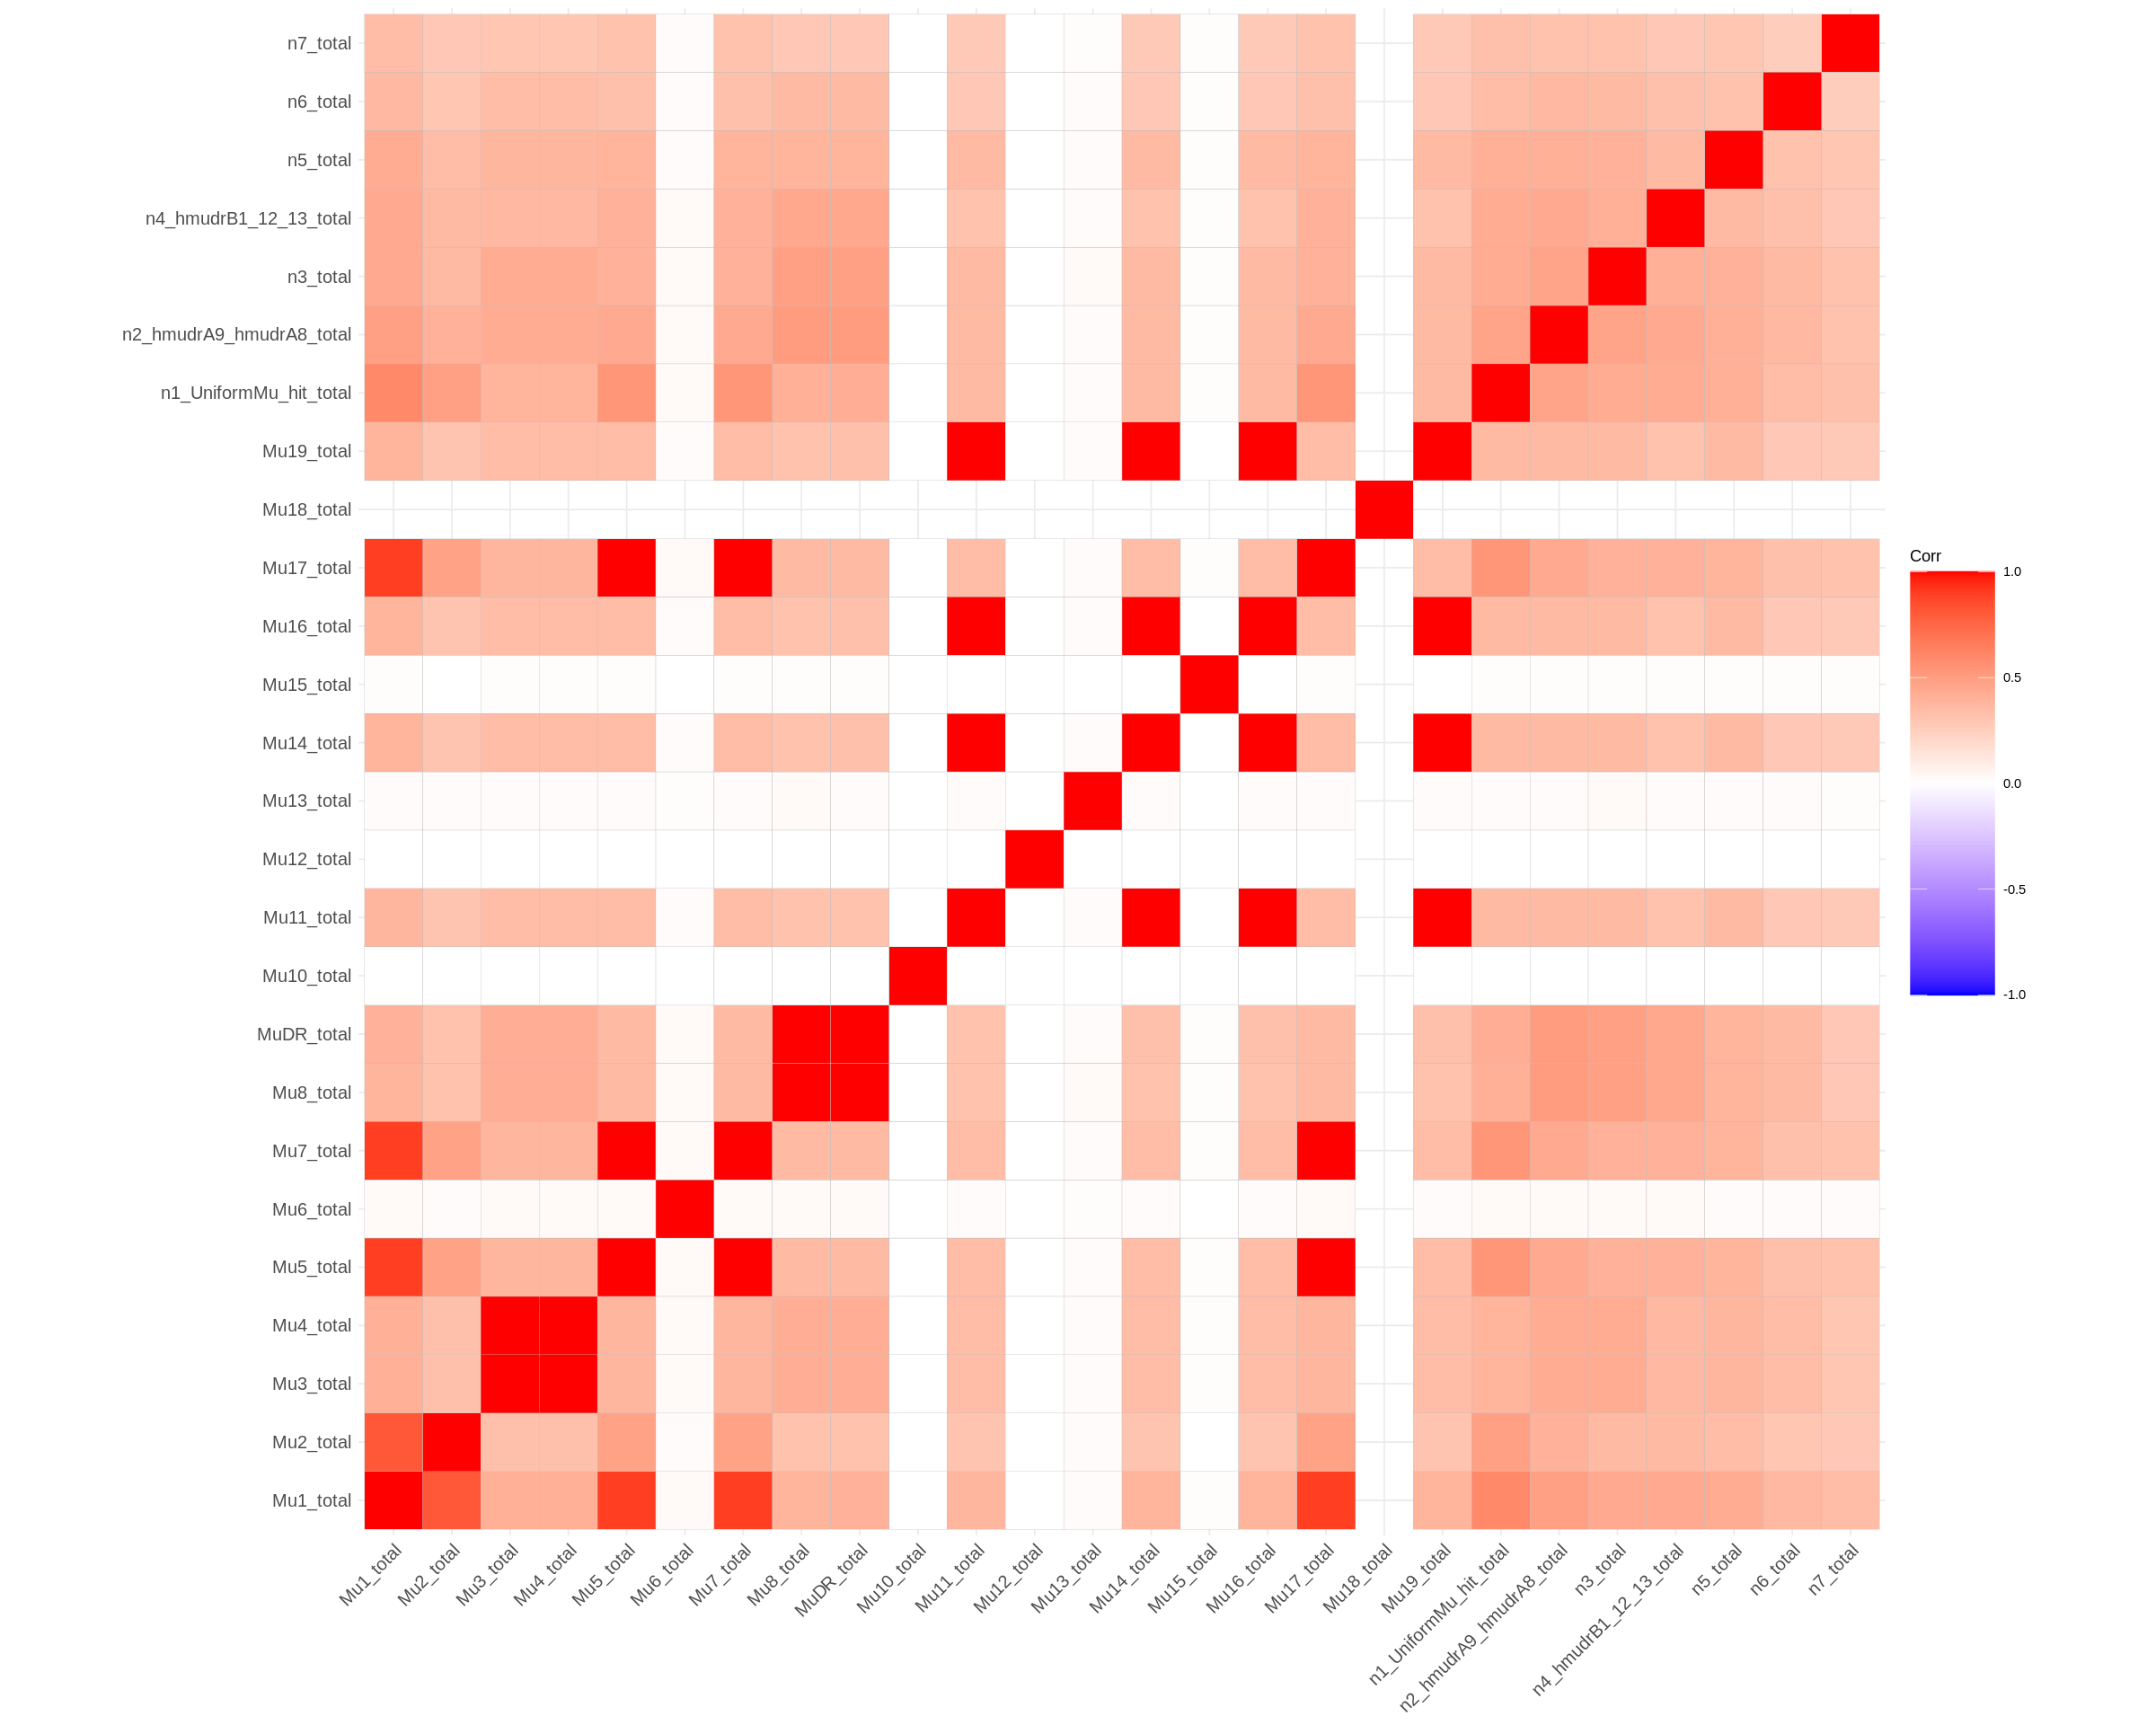

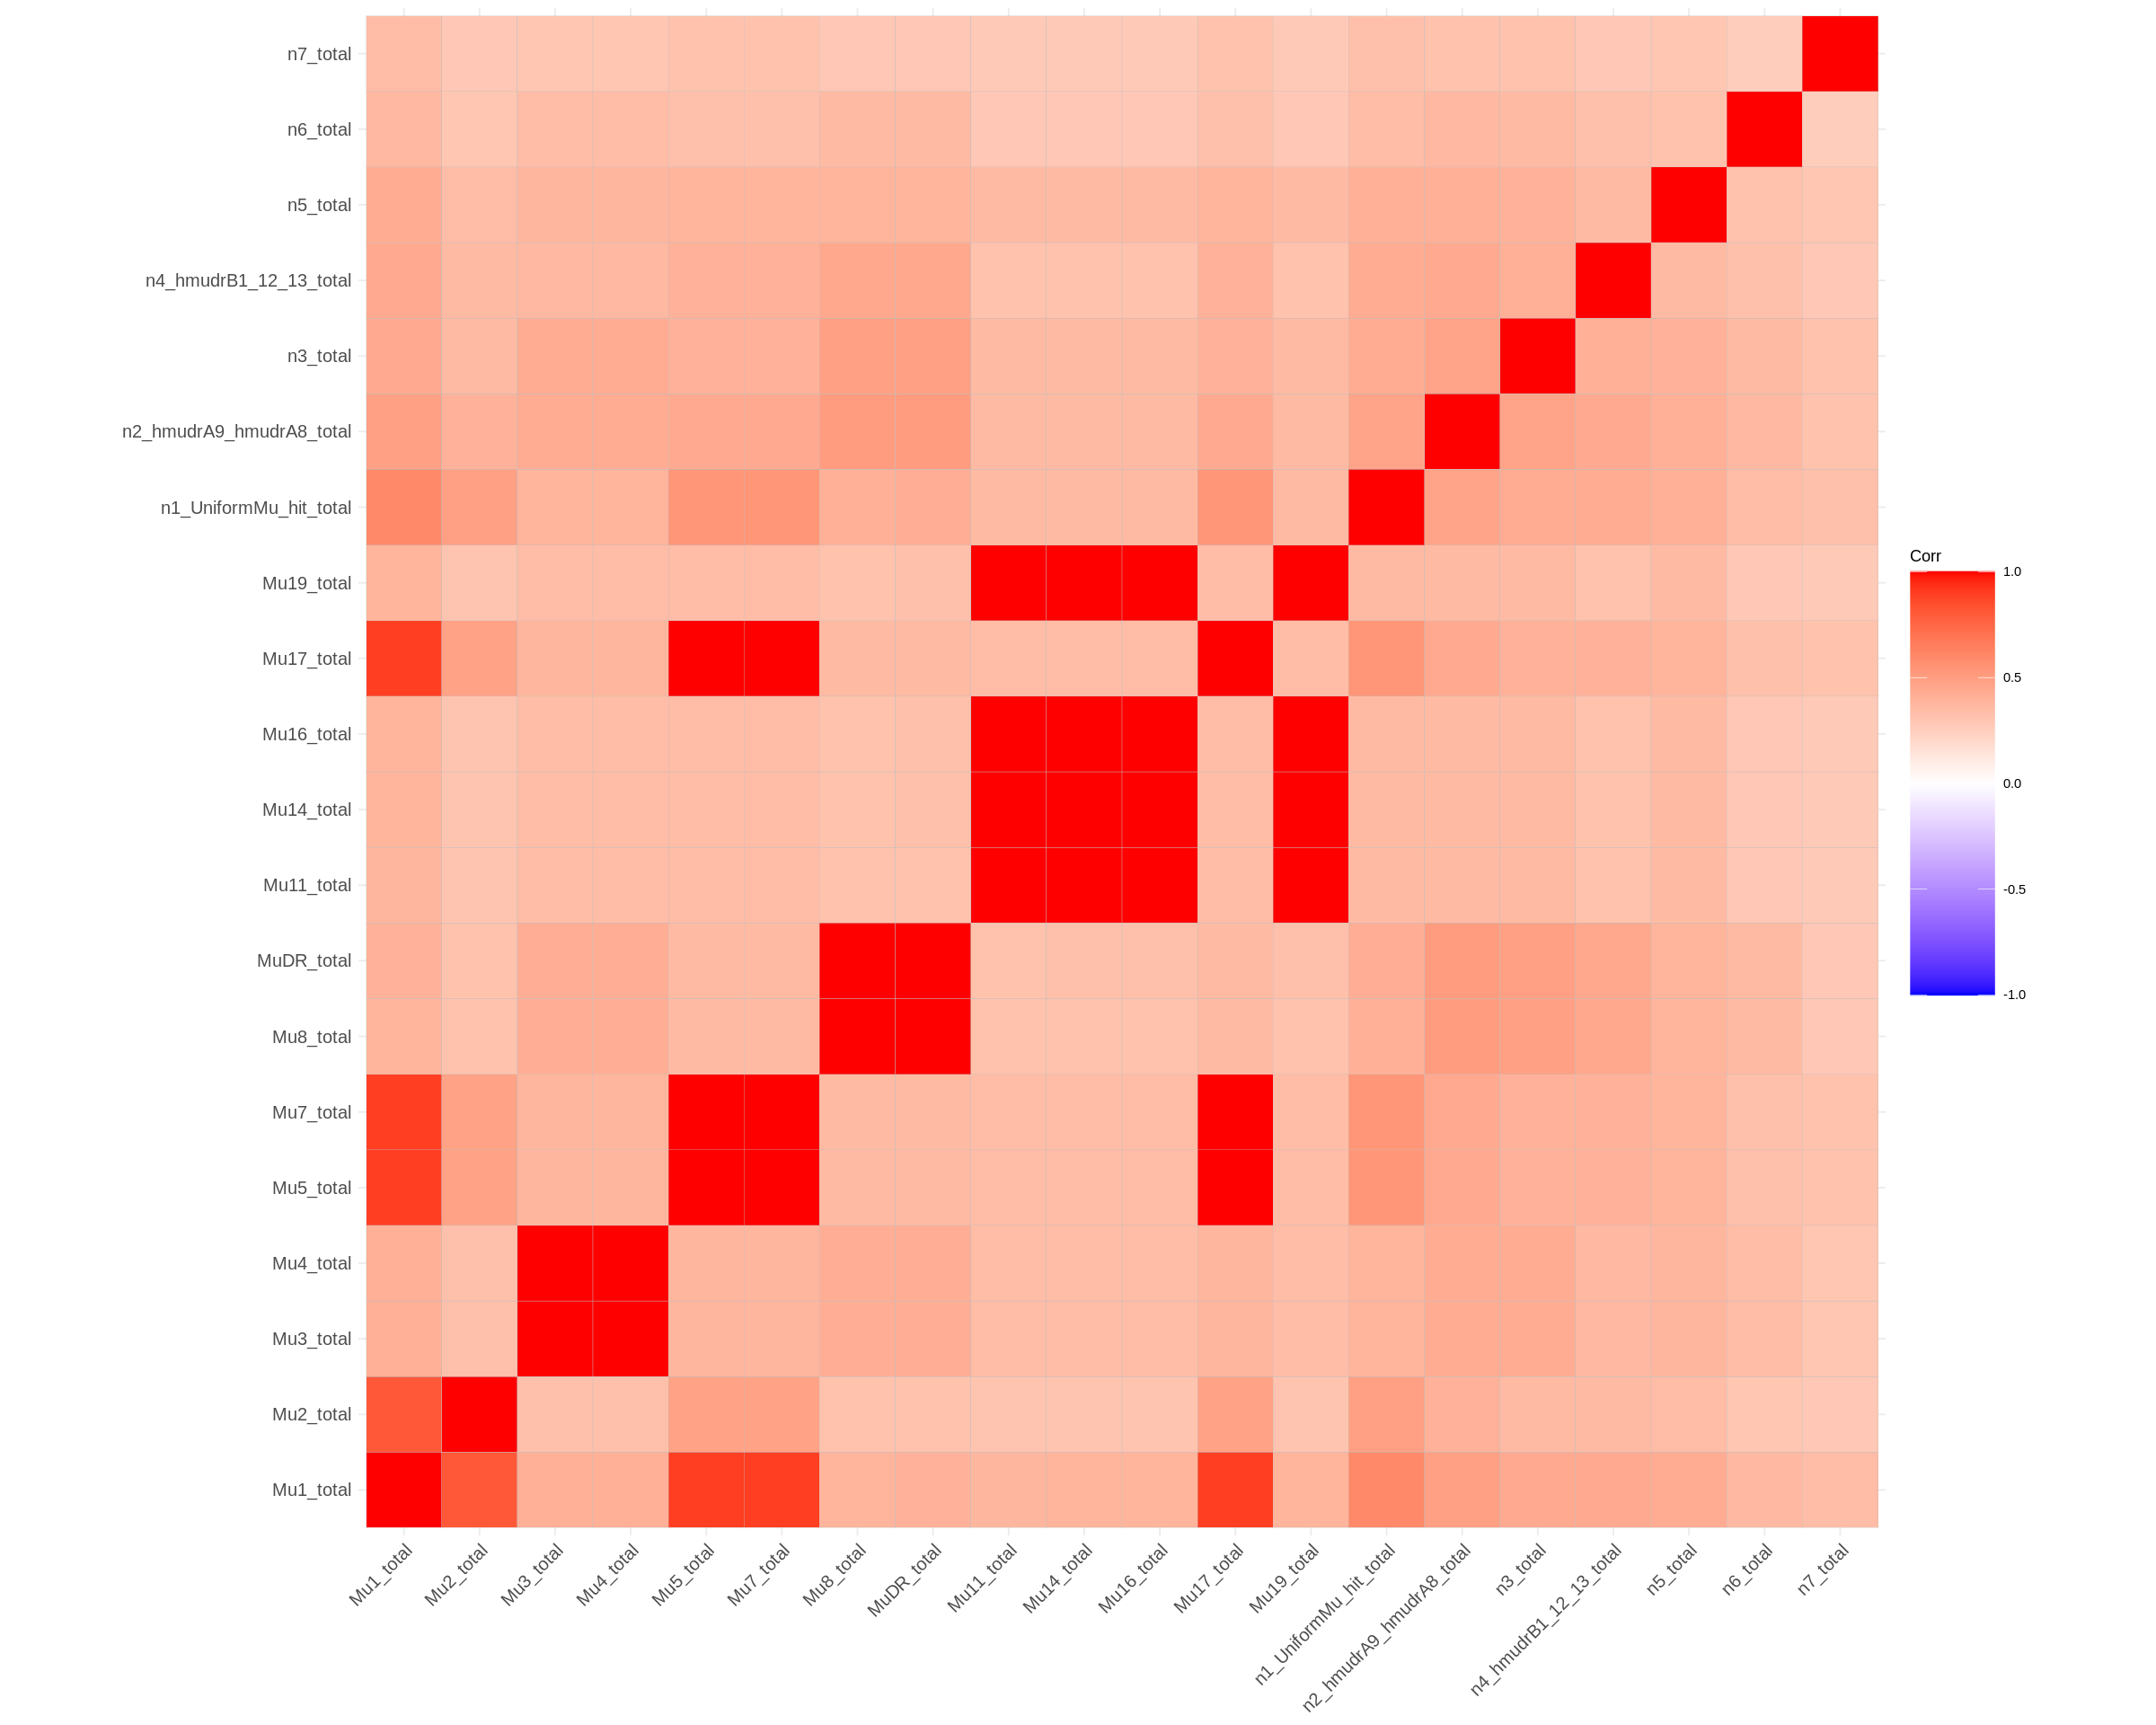

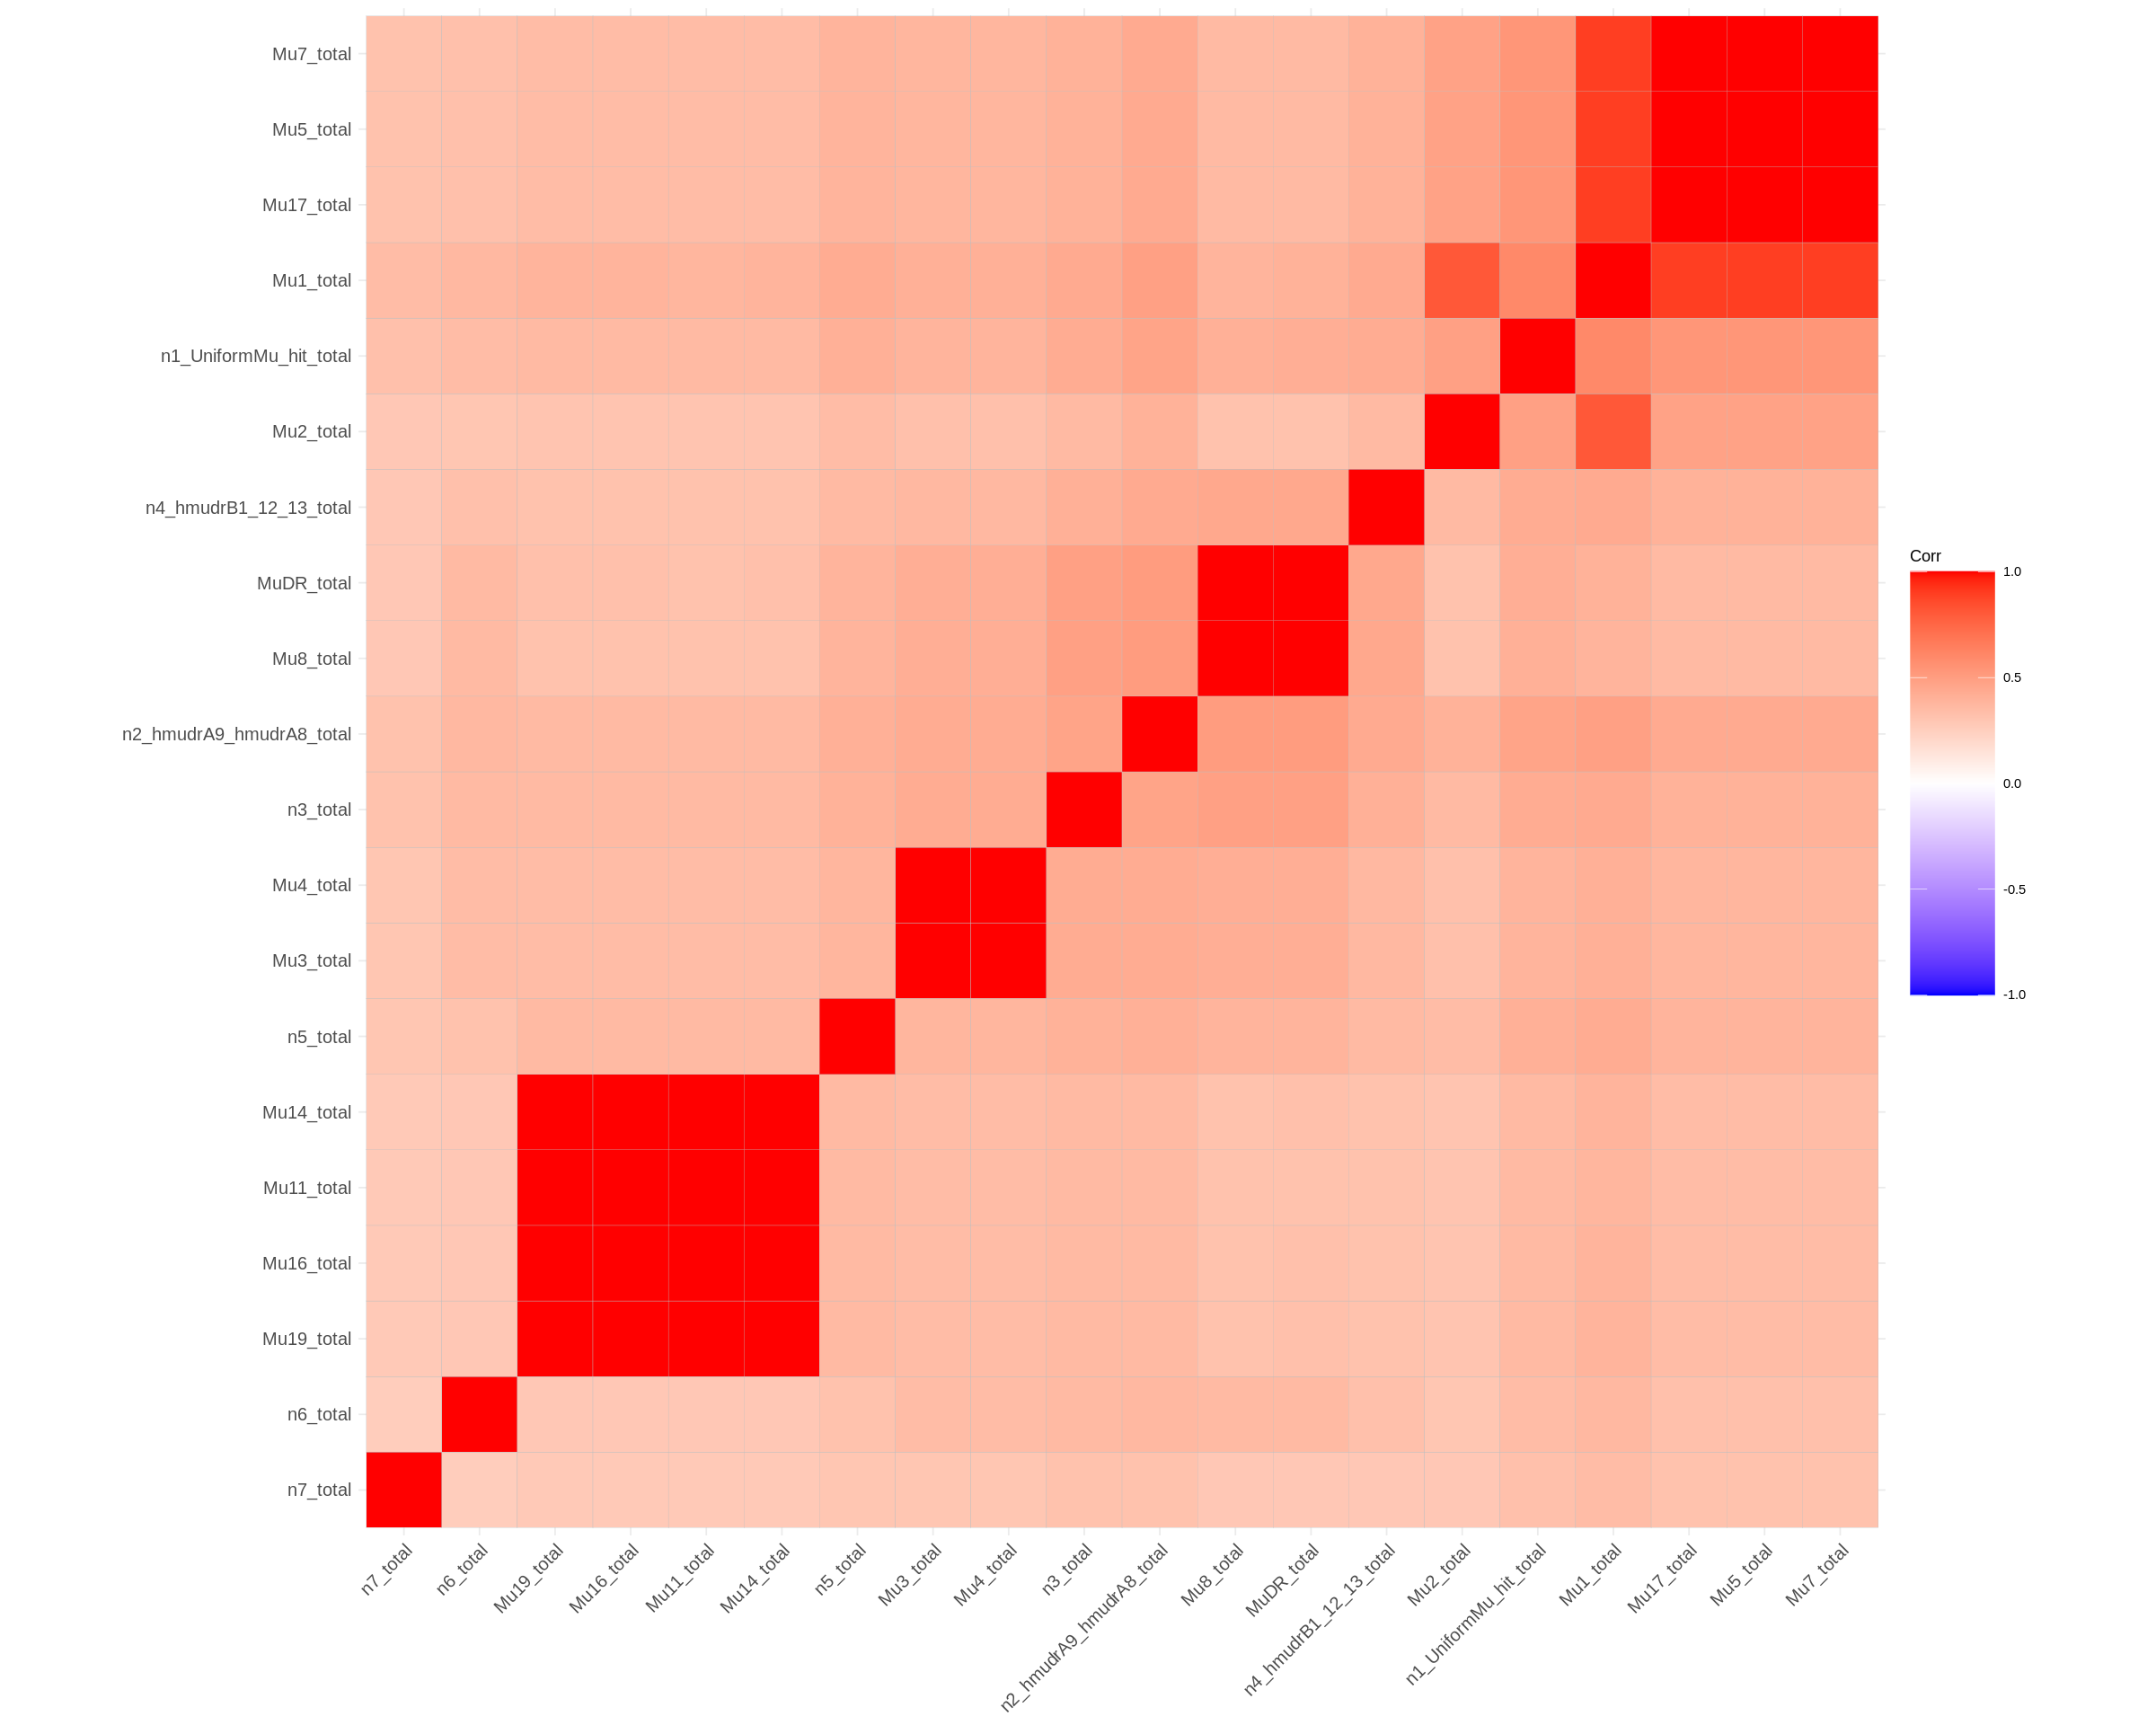

In [151]:
#why not correlation?
B73_Mu_merged %>%
#    filter(lib != "Museq_3") %>%
    filter(StartReads >= 5) %>%
    filter(EndReads >= 5) %>%
    select(Mu1_total,
           Mu2_total,
           Mu3_total,
           Mu4_total,
           Mu5_total,
           Mu6_total,
           Mu7_total,
           Mu8_total,
           MuDR_total,
           Mu10_total,
           Mu11_total,
           Mu12_total,
           Mu13_total,
           Mu14_total,
           Mu15_total,
           Mu16_total,
           Mu17_total,
           Mu18_total,
           Mu19_total,
           n1_UniformMu_hit_total, 
           n2_hmudrA9_hmudrA8_total,
           n3_total,
           n4_hmudrB1_12_13_total,
           n5_total,
           n6_total,
           n7_total) %>%
    cor(method = "pearson") %>% 
      ggcorrplot() +
        theme(legend.key.size = unit(2, 'cm'))


B73_Mu_merged %>%
#    filter(lib != "Museq_3") %>%
    filter(StartReads >= 5) %>%
    filter(EndReads >= 5) %>%
    select(Mu1_total,
           Mu2_total,
           Mu3_total,
           Mu4_total,
           Mu5_total,
#           Mu6_total,
           Mu7_total,
           Mu8_total,
           MuDR_total,
#           Mu10_total,
           Mu11_total,
#           Mu12_total,
#           Mu13_total,
           Mu14_total,
#           Mu15_total,
           Mu16_total,
           Mu17_total,
#           Mu18_total,
           Mu19_total,
           n1_UniformMu_hit_total, 
           n2_hmudrA9_hmudrA8_total,
           n3_total,
           n4_hmudrB1_12_13_total,
           n5_total,
           n6_total,
           n7_total) %>%
    cor(method = "pearson") %>% 
      ggcorrplot(hc.order = FALSE) +
        theme(legend.key.size = unit(2, 'cm'))


B73_Mu_merged %>%
#    filter(lib != "Museq_3") %>%
    filter(StartReads >= 5) %>%
    filter(EndReads >= 5) %>%
    select(Mu1_total,
           Mu2_total,
           Mu3_total,
           Mu4_total,
           Mu5_total,
#           Mu6_total,
           Mu7_total,
           Mu8_total,
           MuDR_total,
#           Mu10_total,
           Mu11_total,
#           Mu12_total,
#           Mu13_total,
           Mu14_total,
#           Mu15_total,
           Mu16_total,
           Mu17_total,
#           Mu18_total,
           Mu19_total,
           n1_UniformMu_hit_total, 
           n2_hmudrA9_hmudrA8_total,
           n3_total,
           n4_hmudrB1_12_13_total,
           n5_total,
           n6_total,
           n7_total) %>%
    cor(method = "pearson") %>% 
      ggcorrplot(hc.order = TRUE, hc.method = "complete") +
        theme(legend.key.size = unit(2, 'cm'))

#### Distribution of type specific Mu species in the maize genomes

### Tables for ordering scientists... primer help

### Playing around with the clustering results

In [97]:
final_clstr <- read.delim("../../only_known_Mu_results/te_typing/uncategorized_clustered/final_clstr_file_germinal_identified_insertions_annotated.tsv", sep="\t")
names(final_clstr) <- c("rep_read", "freq", "motif")
head(final_clstr)

,rep_read,freq,motif
,<chr>,<int>,<chr>
1,HISEQ:638:CC9MVANXX:6:1101:15163:55403\1,2862,CTCTCTTCGTCTATAATGGCAATTATCTC
2,HISEQ:638:CC9MVANXX:6:1101:5469:83060\1,2426,CGCTCTTCTTCTATAATGGCAATTATCTC
3,HISEQ:638:CC9MVANXX:6:1101:17590:10404\1,2258,CCCTCTTCGTCTATAATGGCAATTATCTC
4,HISEQ:638:CC9MVANXX:6:1101:15345:24148\1,1929,CGCTCTTCTTCCATAATGGCAATTATCTC
5,HISEQ:638:CC9MVANXX:6:1101:6445:82894\1,1213,CCCTCTTCTTCTATAATGGCAATTATCTC
6,HISEQ:638:CC9MVANXX:6:1101:4207:13062\1,1111,CCCTCTTCTTCCATAATGGCAATTATCTC


In [98]:
total_uncategorized_reads <- sum(final_clstr$freq)
top_7_motifs <- sum(final_clstr$freq[1:7])

total_uncategorized_reads
top_7_motifs

round(
  (top_7_motifs/total_uncategorized_reads)*100,
  digits = 2  
)

[1] 13210

[1] 11853

[1] 89.73

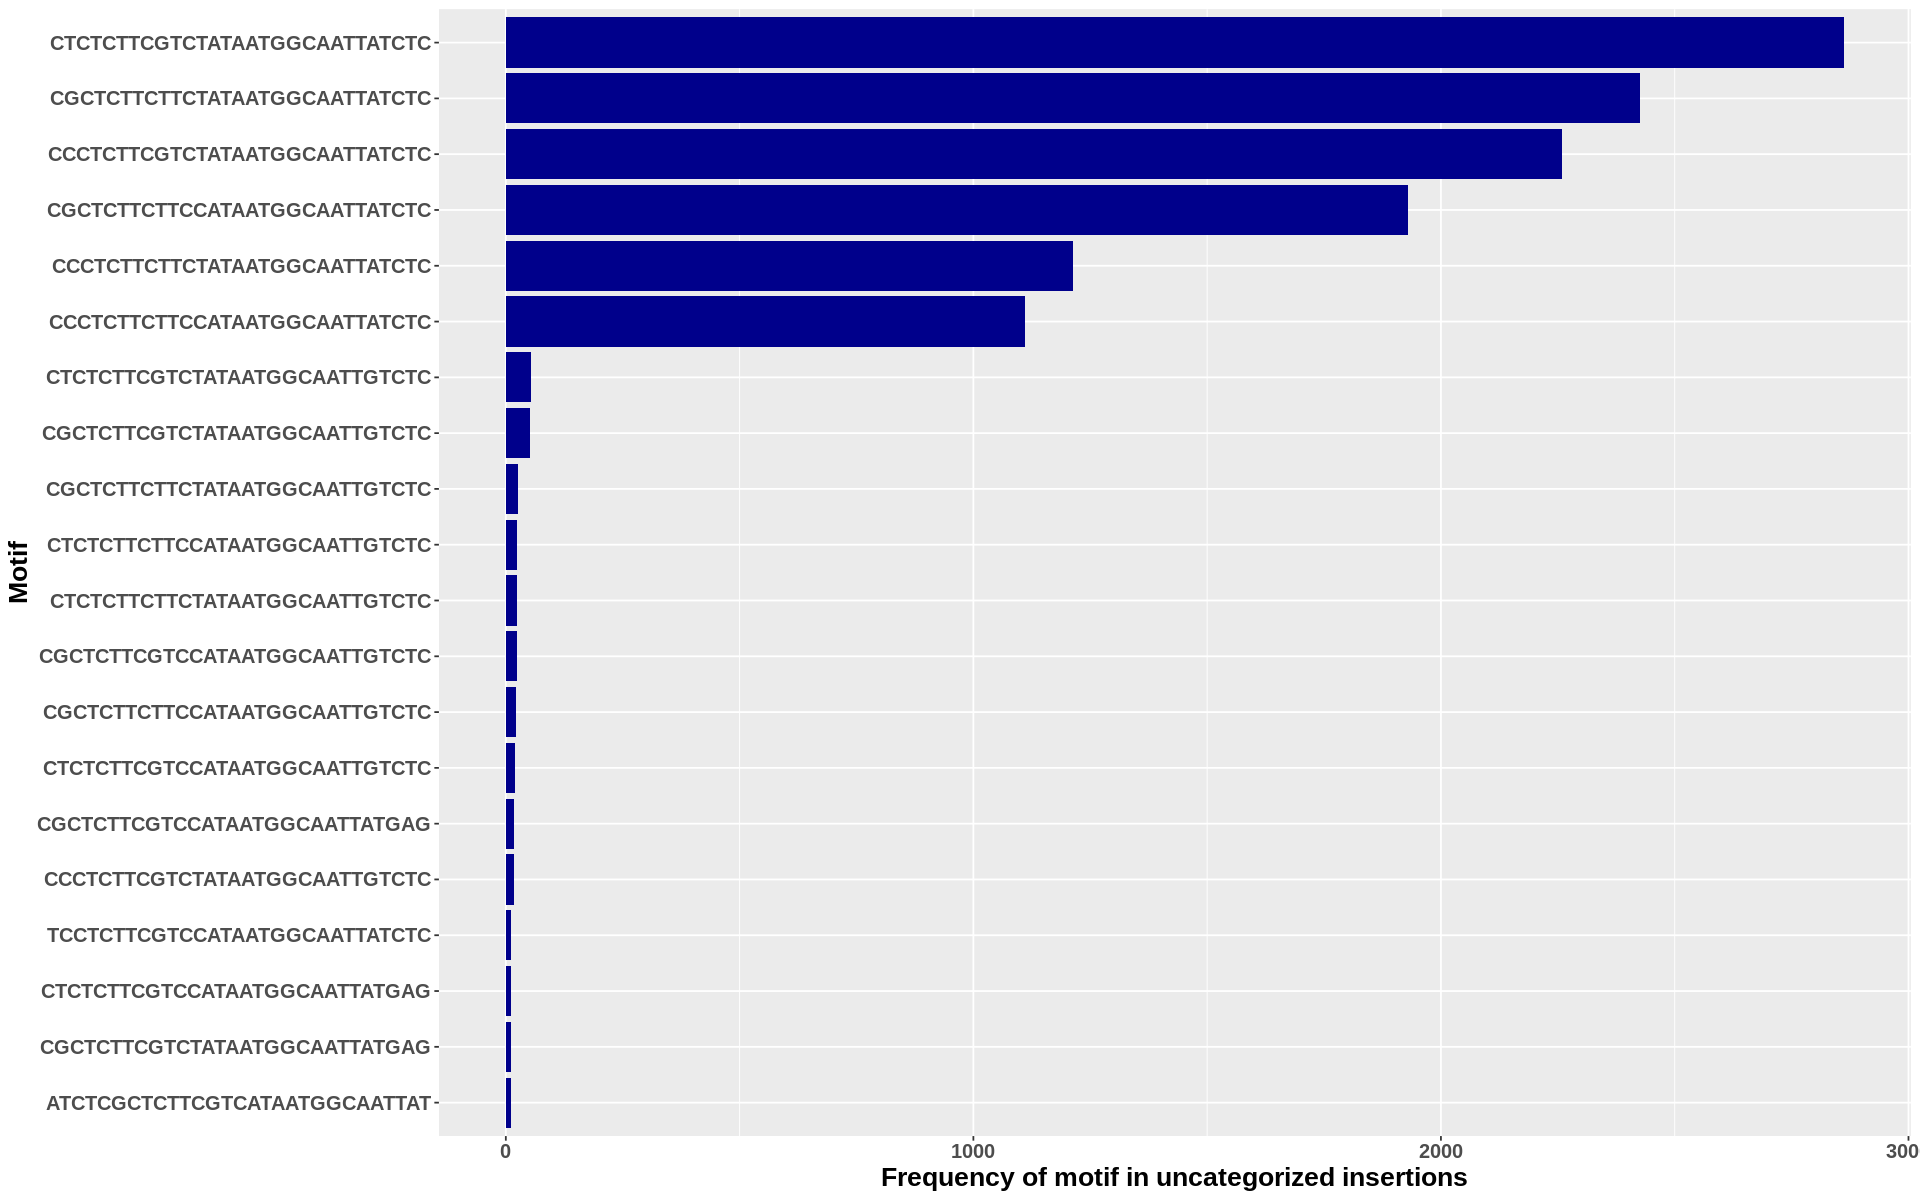

In [99]:
options(repr.plot.width=16, repr.plot.height=10)

final_clstr %>%
  head(n = 20) %>%
  #plotting
  #quick tips on reordering bars; https://sebastiansauer.github.io/ordering-bars/
  ggplot(., aes(y= reorder(motif, freq), x=freq)) +
    geom_col(fill = "darkblue") +
    xlab("Frequency of motif in uncategorized insertions") +
    ylab("Motif") +
    theme(axis.text=element_text(size=12, face="bold"),
          axis.title=element_text(size=16,face="bold"))

#### Plotting with ggtree